# Desafio - Classificação
# Detecção de Fraudes no Setor Financeiro

### Proposto por Patricia Pampanelli (NVIDIA)
### Resolução por Daniel Jullien

## Índice
* [Introdução](#introduction)
* [Metodologia](#methodology)
* [Aquisição de Dados](#data)
* [Tratamento dos Dados](#preprocessing)
* [EDA](#EDA)
* [Feature Engineering](#featureengineering)
* [Modelagem](#modelagem)
* [Anáise dos Resultados](#resultados)
* [Conclusão](#conclusao)
* [Referências](#references)

## 1. Introdução <a name="introduction"></a>

De acordo com a ABECS (https://www.abecs.org.br/) (Associação Brasileira das Empresas de Cartão de Crédito e Serviços), foram movimentados em reais 558 bilhões no primeiro trimestre de 2021 e os cartões de crédito representaram em reais 335 bilhões desse total. Foram 6,5 bilhões de transações, um crescimento de 11,8%, com destaque para cartão de débito que apresentou aumento de 163%. 

O aumento acelerado das transações online nos anos de 2020 e 2021, processo intensificado com o isolamento da pandemia, e os diversos novos serviços que passaram a ser oferecidos digitalmente são um prato cheio para os golpistas, de modo que as fraudes, sobretudo as relacionadas às operações comerciais e financeiras, que impactam, na prática, todos os tipos de indústrias e setores da economia. Do governo, ao banco, do varejista ao microempreendedor, todos precisam conhecer e enfrentar este desafio.

No Brasil em 2021 houveram 4.1 milhões de movimentações suspeitas de fraude, representando  uma tentativa de fraude a cada sete segundos, segundo o Indicador de Tentativas de Fraude da Serasa Experian. Esta quantidade é um aumento de 16.8% em relação ao total de 2020, com valores que ultrapassam R$ 1.8 bilhões de prejuizo por ano [1]. 

Detectar fraudes sempre foi fundamental para minimizar prejuizos no sistema financeiro, mas dado o aumento da tecnologia novas fraudes surgiram, por isso, o investimento na área de detecção de fraudes por meio da Inteligência Artificial continuar crescendo a cada ano, representando uma grande área da Data Science.

De acordo com a Febraban (https://portal.febraban.org.br/) (Federação Brasileira dos Bancos) para mitigar este risco é previsto um gasto anual da ordem de R$ 2 bilhões de reais em TI por ano no Brasil. Porém, o risco é potencializado não somente pela sofisticação dos cybercriminosos, mas também pela insatisfação do consumidor que não só abandona a carteira de clientes, como também se utilizam do próprio código do consumidor, que garante indenização em dobro dos valores cobrados. 

Assim, com o grande volume de dados de transações realizadas, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais em fraudes. Outro fator importante a ser considerado é a quantidade de falsos positivos, ou seja, as transações  normais que são bloqueadas preventivamente ao serem identificadas como fraudes. Geralmente, isso ocorre quando transações fora do padrão do cliente são efetuadas. Isso, no entanto, também deve ser minimizado, uma vez que traz incomodo ao cliente, que pode realizar a transação via outro sistema (cartão, banco, etc) levando a perdas de dinheiro ou mesmo do cliente. O desafio, portanto, é aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas ao mesmo tempo minimizando os falsos positivos.

## Base de dados 

A base de dados que será utilizada para o desenvolvimento deste desafio contém aproximadamente 6,3 milhões de transações. Os dados contidos nesta base de dados são simulados, não sendo transações reais efetuadas em algum sistema financeiro, e compreendem 30 dias. Estas transações podem ser de diferentes tipos e representam transações executadas via mobile devices. As features contidas nesta base de dados são:

- step - Passo: representa o total de horas transcorrido desde o início da simulação. Esta feature vai variar entre 1 e 744 (30 dias);

- type - Tipo: tipo de transação (depósito, saque, débito, pagamento e transferência);

- amount - Quantia: total que foi transacionado;

- nameOrig - ClienteOrigem: cliente que iniciou a transação

- oldbalanceOrg - SaldoInicialOrigem: saldo da conta de origem antes da transação;

- newbalanceOrig - SaldoFinalOrigem: saldo da conta de origem após a transação;

- nameDest - ClienteDestino: cliente de destino da transação;

- oldbalanceDest - SaldoInicialDestino: saldo da conta de destino antes da transação;

- newbalanceDest - SaldoFinalDestino: saldo da conta de destino após a transação;

- isFraud - ÉFraude: flag que define se a transação é fraudulenta ou não. Nesta simulação o objetivo da fraude é assumir a conta do usuário, esvaziá-la transferindo para outra conta e então sacando o dinheiro.

- isFlaggedFraud - SinalizadaComoFraude: automaticamente marcadas pelo banco como fraude por tentarem transferir mais de 200.000 em uma única transação.

## 2. Metodologia<a name="methodology"></a>

A fim de otimizar a detecção de fraudes, o projeto terá as seguintes etapas:

1. Aquisição e tratamento dos dados em caso de:
    - Dados faltantes
    - Dados duplicados
    - Dados incorretamente preenchidos
2. Análise exploratória de dados 
3. Feature Engineering
4. Modelagem
    - Modelos baseline
        - Logistic Regression
        - KNN
        - Decision Tree
        - Random Forest
        - Gradient Boosting
        - XGBoost
    - Modelos baseline com manipulação do threshold
    - Modelos com Class Weight
    - Rebalanceamento com Undersampling
    - Rebalanceamento com Oversampling
    - Rebalanceamento com SMOTE
    - Rebalanceamento com ADASYN

## 3. Aquisição de Dados<a name="data"></a>

Será utilizado o sklearn para pré processamento dos dados e sklearn e xgboost para modelagem. Para rebalanceamento, a biblioteca imblearn será usada.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Bibliotecas para tratamento de dados em cpu
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.5f' % x) # evita que o pandas utilize notação científica

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# Bibliotecas processamento
from sklearn.preprocessing import Normalizer, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# Métricas
from sklearn.metrics import accuracy_score, recall_score,f1_score, roc_auc_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report

# Bibliotecas de Rebalanceamento
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE

# Classifier Models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Feature importance
from sklearn.inspection import permutation_importance

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
df_raw = pd.read_csv('fraud_detection_dataset.csv')
# df_raw = pd.read_csv('/content/drive/MyDrive/Estudos/Portfólio/Desafio 3 - Classificação - Detecção de Fraude/fraud_detection_dataset.csv')

In [4]:
df_raw.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64000,C1231006815,170136.00000,160296.36000,M1979787155,0.00000,0.00000,0,0
1,1,PAYMENT,1864.28000,C1666544295,21249.00000,19384.72000,M2044282225,0.00000,0.00000,0,0


In [5]:
df_raw.shape

(6362620, 11)

## 4. Tratamento dos Dados<a name="preprocessing"></a>

Iniciaremos avaliando a necessidade de tratamento dos dados, como missing values, valores incorretamente gerados ou duplicados. Uma cópia será utilizada, para reacessar o dado original caso necessário.

In [6]:
df_treated = df_raw.copy()

In [7]:
df_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Para padronizar, mudaremos 'Org' para 'Orig'.

In [8]:
df_treated.rename(columns={'oldbalanceOrg':'oldbalanceOrig'}, inplace=True)

In [9]:
df_treated.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrig    0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df_treated.duplicated().sum()

0

Não há valores faltantes nem duplicados.

Investigaremos se existem dados incorretamente gerados.

In [11]:
df_treated.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99], include='all')

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00000,6362620,6362620.00000,6362620,6362620.00000,6362620.00000,6362620,6362620.00000,6362620.00000,6362620.00000,6362620.00000
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1832548028,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,243.39725,NaN,179861.90355,NaN,833883.10407,855113.66858,NaN,1100701.66652,1224996.39820,0.00129,0.00000
std,142.33197,NaN,603858.23146,NaN,2888242.67301,2924048.50297,NaN,3399180.11297,3674128.94209,0.03590,0.00159
min,1.00000,NaN,0.00000,NaN,0.00000,0.00000,NaN,0.00000,0.00000,0.00000,0.00000
1%,9.00000,NaN,449.46760,NaN,0.00000,0.00000,NaN,0.00000,0.00000,0.00000,0.00000
5%,16.00000,NaN,2224.09950,NaN,0.00000,0.00000,NaN,0.00000,0.00000,0.00000,0.00000
25%,156.00000,NaN,13389.57000,NaN,0.00000,0.00000,NaN,0.00000,0.00000,0.00000,0.00000


In [12]:
df_treated['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [13]:
df_investigate = df_treated[df_treated['type']=='TRANSFER'].copy()

In [14]:
df_investigate[df_investigate['oldbalanceOrig'] == df_investigate['newbalanceOrig']]

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
79,1,TRANSFER,77957.68000,C207471778,0.00000,0.00000,C1761291320,94900.00000,22233.65000,0,0
80,1,TRANSFER,17231.46000,C1243171897,0.00000,0.00000,C783286238,24672.00000,0.00000,0,0
81,1,TRANSFER,78766.03000,C1376151044,0.00000,0.00000,C1749186397,103772.00000,277515.05000,0,0
82,1,TRANSFER,224606.64000,C873175411,0.00000,0.00000,C766572210,354678.92000,0.00000,0,0
83,1,TRANSFER,125872.53000,C1443967876,0.00000,0.00000,C392292416,348512.00000,3420103.09000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6355891,709,TRANSFER,273051.66000,C2035190075,0.00000,0.00000,C1404837226,510576.10000,783627.75000,0,0
6355892,709,TRANSFER,318787.81000,C588510083,0.00000,0.00000,C70442812,1172469.64000,1491257.45000,0,0
6362460,730,TRANSFER,10000000.00000,C2140038573,17316255.05000,17316255.05000,C1395467927,0.00000,0.00000,1,1
6362462,730,TRANSFER,7316255.05000,C1869569059,17316255.05000,17316255.05000,C1861208726,0.00000,0.00000,1,1


In [15]:
df_investigate = df_treated[df_treated['type']=='PAYMENT'].copy()

In [16]:
df_investigate[df_investigate['oldbalanceOrig'] == df_investigate['newbalanceOrig']]

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
29,1,PAYMENT,9920.52000,C764826684,0.00000,0.00000,M1940055334,0.00000,0.00000,0,0
30,1,PAYMENT,3448.92000,C2103763750,0.00000,0.00000,M335107734,0.00000,0.00000,0,0
31,1,PAYMENT,4206.84000,C215078753,0.00000,0.00000,M1757317128,0.00000,0.00000,0,0
32,1,PAYMENT,5885.56000,C840514538,0.00000,0.00000,M1804441305,0.00000,0.00000,0,0
33,1,PAYMENT,5307.88000,C1768242710,0.00000,0.00000,M1971783162,0.00000,0.00000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6355956,709,PAYMENT,17274.64000,C1145612250,0.00000,0.00000,M1690894052,0.00000,0.00000,0,0
6355957,709,PAYMENT,20380.42000,C619971661,0.00000,0.00000,M1289697387,0.00000,0.00000,0,0
6355981,709,PAYMENT,5387.46000,C460753297,0.00000,0.00000,M573565290,0.00000,0.00000,0,0
6355984,709,PAYMENT,3837.05000,C1751522910,0.00000,0.00000,M903863937,0.00000,0.00000,0,0


In [17]:
df_investigate = df_treated[df_treated['type']=='CASH_OUT'].copy()

In [18]:
df_investigate[df_investigate['oldbalanceOrig'] == df_investigate['newbalanceOrig']]

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
48,1,CASH_OUT,5346.89000,C512549200,0.00000,0.00000,C248609774,652637.00000,6453430.91000,0,0
106,1,CASH_OUT,28404.60000,C2091072548,0.00000,0.00000,C1282788025,51744.00000,0.00000,0,0
107,1,CASH_OUT,75405.10000,C263053820,0.00000,0.00000,C1870252780,104209.00000,46462.23000,0,0
108,1,CASH_OUT,50101.88000,C1740826931,0.00000,0.00000,C97730845,67684.00000,9940339.29000,0,0
109,1,CASH_OUT,14121.82000,C69062746,0.00000,0.00000,C100555887,52679.00000,10963.66000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6356051,709,CASH_OUT,244966.80000,C2092646234,0.00000,0.00000,C211766342,5254563.09000,5499529.89000,0,0
6356052,709,CASH_OUT,123403.11000,C1054278487,0.00000,0.00000,C1948756721,606875.62000,730278.74000,0,0
6362461,730,CASH_OUT,0.00000,C729003789,0.00000,0.00000,C1388096959,1008609.53000,1008609.53000,1,0
6362463,730,CASH_OUT,0.00000,C2088151490,0.00000,0.00000,C1156763710,0.00000,0.00000,1,0


In [19]:
df_investigate = df_treated[df_treated['type']=='DEBIT'].copy()

In [20]:
df_investigate[df_investigate['oldbalanceOrig'] == df_investigate['newbalanceOrig']]

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
330,1,DEBIT,7344.92000,C334593716,0.00000,0.00000,C485041780,185432.00000,0.00000,0,0
3388,2,DEBIT,3476.19000,C1899938605,0.00000,0.00000,C392292416,5056707.37000,4450740.26000,0,0
6240,6,DEBIT,1322.22000,C948849701,0.00000,0.00000,C453211571,5468321.58000,5950433.65000,0,0
12752,7,DEBIT,3600.31000,C228404286,0.00000,0.00000,C648021642,85838.00000,324340.80000,0,0
12753,7,DEBIT,10244.28000,C371410765,0.00000,0.00000,C1629709129,23372.00000,317588.81000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6339973,692,DEBIT,7894.44000,C1450466839,0.00000,0.00000,C884211135,526902.49000,534796.93000,0,0
6339974,692,DEBIT,3374.15000,C1689196627,0.00000,0.00000,C536248484,3539.95000,6914.10000,0,0
6339975,692,DEBIT,5436.05000,C1343092565,0.00000,0.00000,C140725940,2923330.18000,2928766.23000,0,0
6339976,692,DEBIT,869.82000,C121781769,0.00000,0.00000,C867062506,461331.84000,462201.66000,0,0


In [21]:
df_investigate = df_treated[df_treated['type']=='CASH_IN'].copy()

In [22]:
df_investigate[df_investigate['oldbalanceOrig'] == df_investigate['newbalanceOrig']]

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
456,1,CASH_IN,110226.34000,C1475192960,1601450.63000,1601450.63000,C1816757085,1601450.63000,10681238.79000,0,0
656,1,CASH_IN,770537.37000,C2015999862,8499043.13000,8499043.13000,C1883840933,8499043.13000,16874643.09000,0,0
1292,1,CASH_IN,61505.91000,C1790387225,4910403.44000,4910403.44000,C11003494,4910403.44000,10588885.27000,0,0
1293,1,CASH_IN,404167.60000,C984412970,4910403.44000,4910403.44000,C11003494,4910403.44000,10588885.27000,0,0
2129,1,CASH_IN,42012.45000,C1137667747,350501.24000,350501.24000,C667346055,350501.24000,9291619.62000,0,0
2246,1,CASH_IN,187256.62000,C1106468732,521018.57000,521018.57000,C662736689,521018.57000,4891090.56000,0,0
2678,1,CASH_IN,208664.25000,C1216611732,4800759.18000,4800759.18000,C1870252780,4800759.18000,7416184.79000,0,0
2694,1,CASH_IN,301755.98000,C1544031987,6509377.51000,6509377.51000,C1870252780,6509377.51000,7416184.79000,0,0
2751,2,CASH_IN,305762.25000,C690051320,1957713.69000,1957713.69000,C1778801068,1957713.69000,8813776.61000,0,0
2923,2,CASH_IN,275712.54000,C1378612814,6269058.27000,6269058.27000,C1122118227,6269058.27000,11073556.18000,0,0


Vemos que existem diversas transações (de todos os tipos) de valores não nulos em que o valor em conta após a transferência não se altera. Isso é uma situação que pode ser considerada um erro, no entanto, pode haver uma justificativa que o time de negócios poderia identificar. No caso, como são dados gerados sintéticamente, não iremos realizar nenhuma modificação relativo a isso.

## 5. EDA<a name="EDA"></a>

Primeiro passo é entender a distribuição dos dados de transições normais e transições fraudulentas. 

In [23]:
df_treated['isFraud'].value_counts(normalize=True)*100

0   99.87092
1    0.12908
Name: isFraud, dtype: float64

In [24]:
df_treated['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [25]:
df_treated['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [26]:
16*100/8213

0.19481310118105444

Como esperado, o dataset é extremamente desbalanceado, com apenas 0.12% dos dados representando fraudes. Dentre as fraudes, apenas 0.2% delas foram automaticamente marcadas pelo banco como fraude por tentarem transferir mais de 200.000 em uma única transação.

Iremos avaliar agora os dados nas features.<br>
Uma vez que muitas vezes analisarei separadamente a base de dados de transações normais da base de transações fraudulentas, criarei duas bases.

In [27]:
df_frauds = df_treated[df_treated['isFraud']==1]
df_normal = df_treated[df_treated['isFraud']==0]

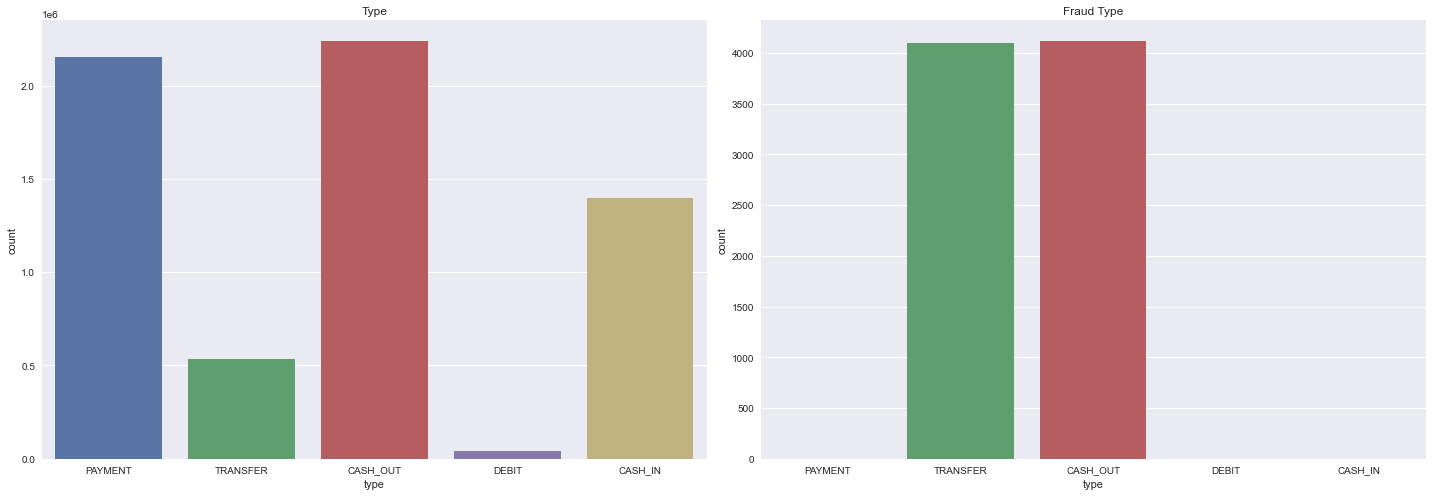

In [28]:
fig, axes = plt.subplots(1,2,figsize=(20,7)) 

sns.countplot(data = df_treated, ax=axes[0], x = 'type', order = ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'])
axes[0].set_title('Type')

sns.countplot(data = df_frauds, ax=axes[1], x='type', order = ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'])
axes[1].set_title('Fraud Type')

plt.tight_layout()
plt.show()   

Só existem fraudes identificadas dos tipos transfer e cash out, no entanto, é importante avaliar e modelar com todos os dados, pois ajudam a entender o tipo de transação usualmente feito pela conta.

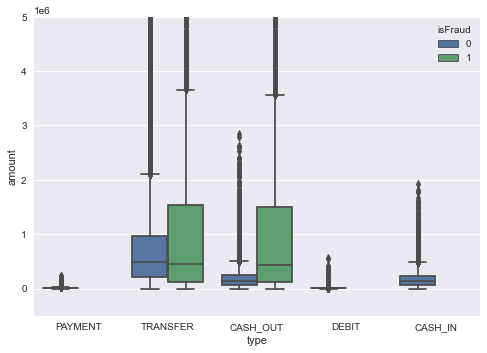

In [29]:
ax = sns.boxplot(data = df_treated, x='type', y='amount', hue='isFraud')
ax.set_ylim([-500000, 5000000])
plt.show()

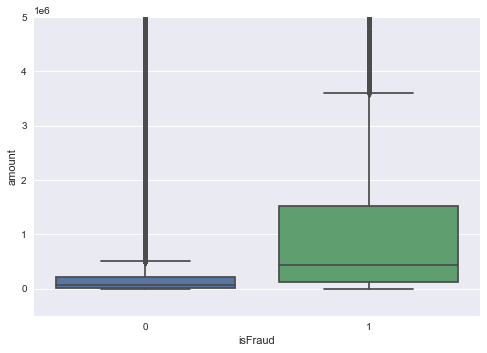

In [30]:
ax = sns.boxplot(data = df_treated, x='isFraud', y='amount')
ax.set_ylim([-500000, 5000000])
plt.show()

Fraudes tem, em geral, valores mais altos que os valores de transações usuais, em especial as fraudes do tipo saque. 

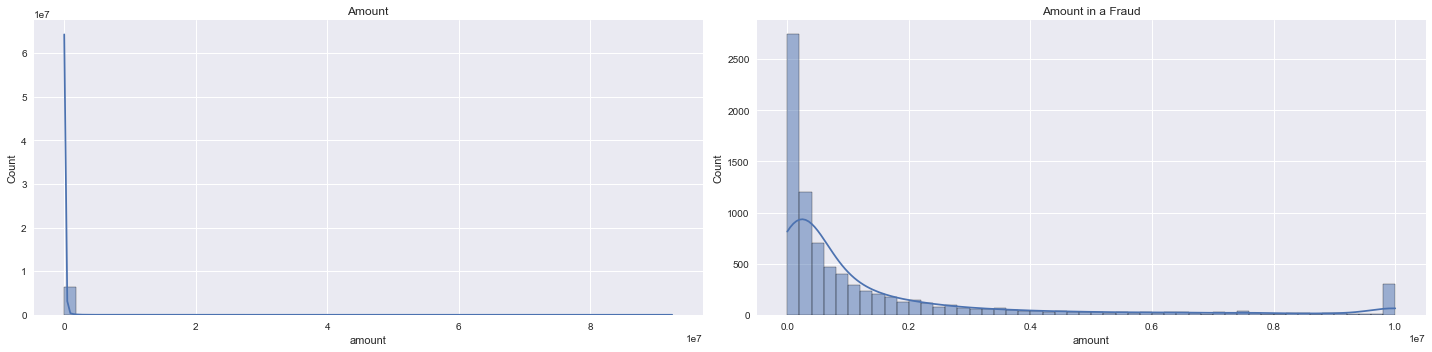

In [31]:
fig, axes = plt.subplots(1,2,figsize=(20,5)) 

sns.histplot(data = df_treated, ax=axes[0], x = 'amount', kde=True, bins = 50)
axes[0].set_title('Amount')

sns.histplot(data = df_frauds, ax=axes[1], x = 'amount', kde=True, bins = 50)
axes[1].set_title('Amount in a Fraud')

plt.tight_layout()
plt.show()   

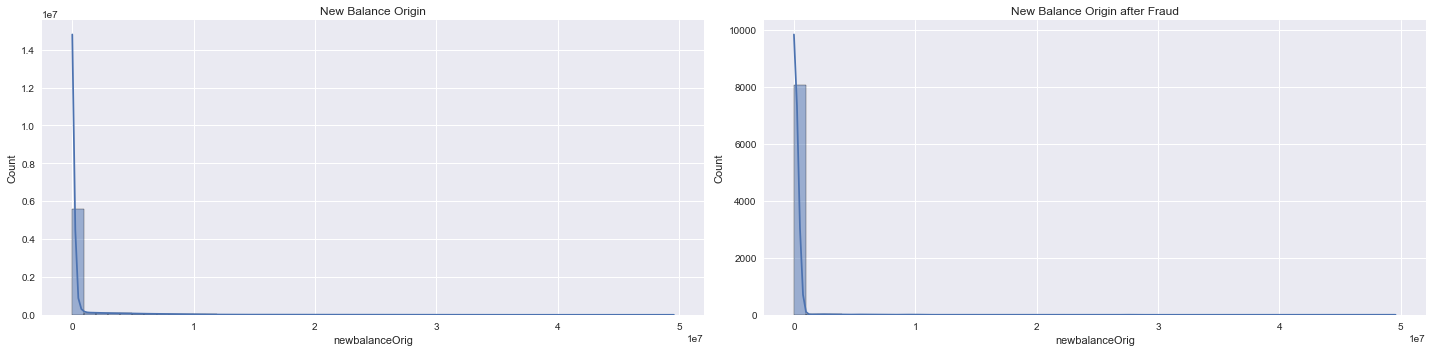

In [32]:
fig, axes = plt.subplots(1,2,figsize=(20,5)) 

sns.histplot(data = df_treated, ax=axes[0], x = 'newbalanceOrig', kde=True, bins = 50)
axes[0].set_title('New Balance Origin')

sns.histplot(data = df_frauds, ax=axes[1], x = 'newbalanceOrig', kde=True, bins = 50)
axes[1].set_title('New Balance Origin after Fraud')

plt.tight_layout()
plt.show()   

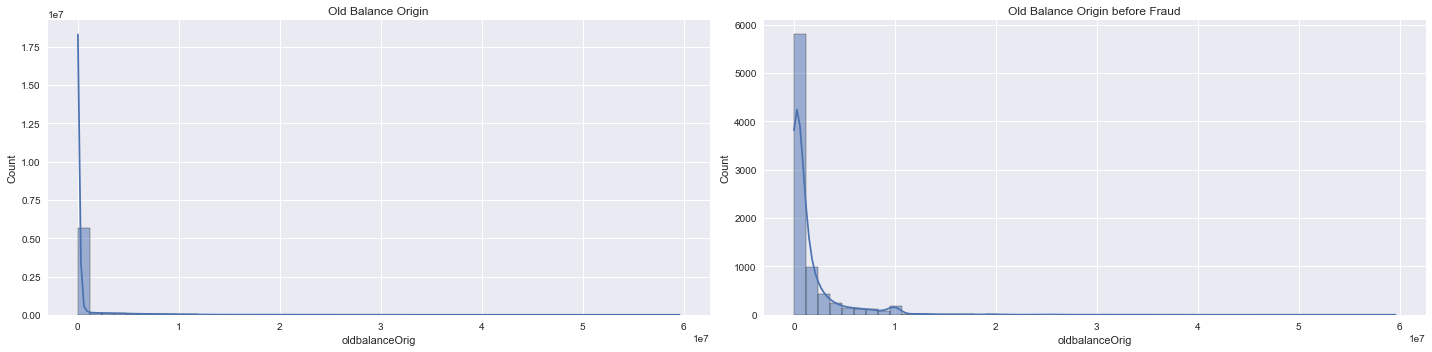

In [33]:
fig, axes = plt.subplots(1,2,figsize=(20,5)) 

sns.histplot(data = df_treated, ax=axes[0], x = 'oldbalanceOrig', kde=True, bins = 50)
axes[0].set_title('Old Balance Origin')

sns.histplot(data = df_frauds, ax=axes[1], x = 'oldbalanceOrig', kde=True, bins = 50)
axes[1].set_title('Old Balance Origin before Fraud')

plt.tight_layout()
plt.show()   

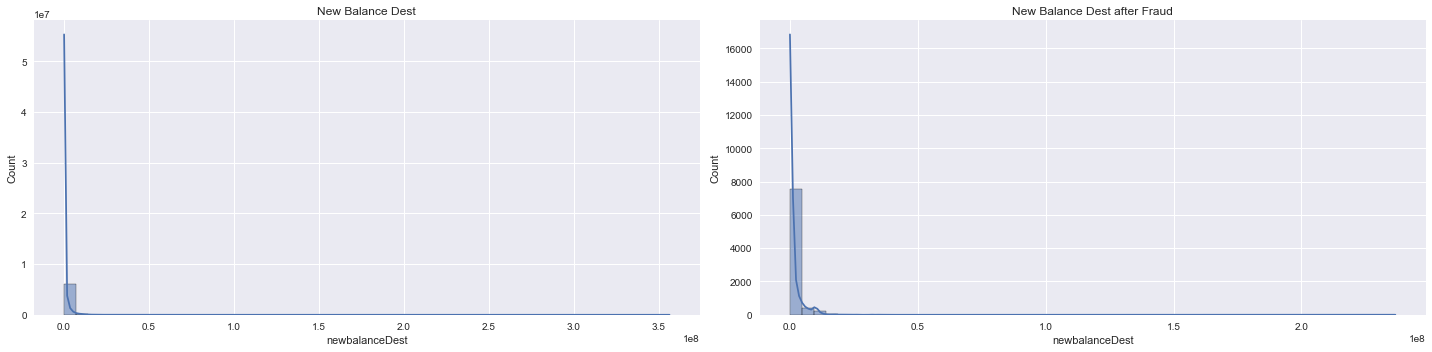

In [34]:
fig, axes = plt.subplots(1,2,figsize=(20,5)) 

sns.histplot(data = df_treated, ax=axes[0], x = 'newbalanceDest', kde=True, bins = 50)
axes[0].set_title('New Balance Dest')

sns.histplot(data = df_frauds, ax=axes[1], x = 'newbalanceDest', kde=True, bins = 50)
axes[1].set_title('New Balance Dest after Fraud')

plt.tight_layout()
plt.show()   

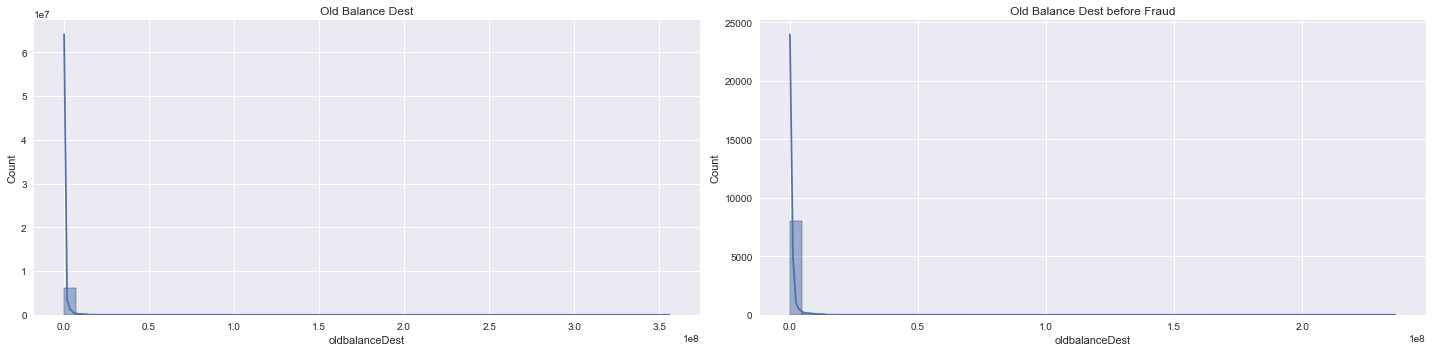

In [35]:
fig, axes = plt.subplots(1,2,figsize=(20,5)) 

sns.histplot(data = df_treated, ax=axes[0], x = 'oldbalanceDest', kde=True, bins = 50)
axes[0].set_title('Old Balance Dest')

sns.histplot(data = df_frauds, ax=axes[1], x = 'oldbalanceDest', kde=True, bins = 50)
axes[1].set_title('Old Balance Dest before Fraud')

plt.tight_layout()
plt.show()   

Existe uma concentração de contas com valores mais baixos.<br>
Os valores de transações fraudulentas 10.000.000, enquanto os valores de transações normais chegam a 100.000.000

In [36]:
df_treated['nameOrig'].value_counts().sort_values(ascending=False)

C1832548028    3
C2051359467    3
C1677795071    3
C1530544995    3
C1976208114    3
              ..
C971585131     1
C1464078355    1
C259902492     1
C1088338553    1
C578067201     1
Name: nameOrig, Length: 6353307, dtype: int64

In [37]:
df_frauds['nameOrig'].value_counts().sort_values(ascending=False)

C1257904471    1
C2023614214    1
C567545309     1
C776792146     1
C1843014674    1
              ..
C1042923577    1
C432562518     1
C140359285     1
C1628562361    1
C753670111     1
Name: nameOrig, Length: 8213, dtype: int64

In [38]:
df_treated['nameDest'].value_counts().sort_values(ascending=False)

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M2070939687      1
M1302282615      1
M2138833649      1
M1347194482      1
M1202402952      1
Name: nameDest, Length: 2722362, dtype: int64

In [39]:
df_frauds['nameDest'].value_counts().sort_values(ascending=False)

C1653587362    2
C1980653895    2
C475338087     2
C1827800010    2
C1601170327    2
              ..
C1842013922    1
C370224798     1
C1547230458    1
C88210735      1
C1971951800    1
Name: nameDest, Length: 8169, dtype: int64

Existem destinatários muito comuns em transições não fraudulentas e não existe uma repetição de transações fraudulentas de uma mesma conta de origem (o que é inesperado, supondo que se alguém mal intencionado tivesse acesso a uma conta, poderia tentar diversas transações fraudulentas). 

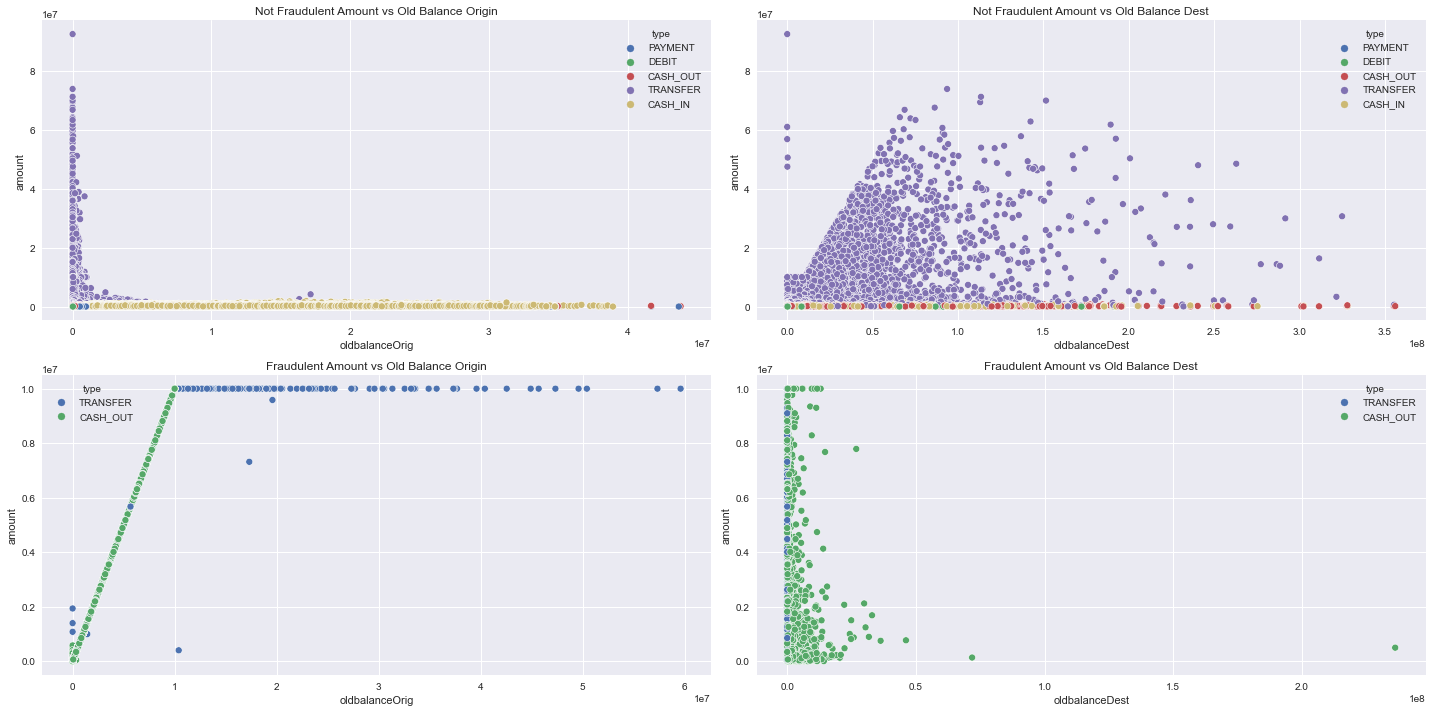

In [40]:
fig, axes = plt.subplots(2,2,figsize=(20,10)) 


sns.scatterplot(data = df_normal, ax=axes[0][0], x = 'oldbalanceOrig', y='amount', hue='type')
axes[0][0].set_title('Not Fraudulent Amount vs Old Balance Origin')

sns.scatterplot(data = df_normal, ax=axes[0][1], x = 'oldbalanceDest', y='amount', hue='type')
axes[0][1].set_title('Not Fraudulent Amount vs Old Balance Dest')

sns.scatterplot(data = df_frauds, ax=axes[1][0], x = 'oldbalanceOrig', y='amount', hue='type')
axes[1][0].set_title('Fraudulent Amount vs Old Balance Origin')

sns.scatterplot(data = df_frauds, ax=axes[1][1], x = 'oldbalanceDest', y='amount', hue='type')
axes[1][1].set_title('Fraudulent Amount vs Old Balance Dest')

plt.tight_layout()
plt.show()   

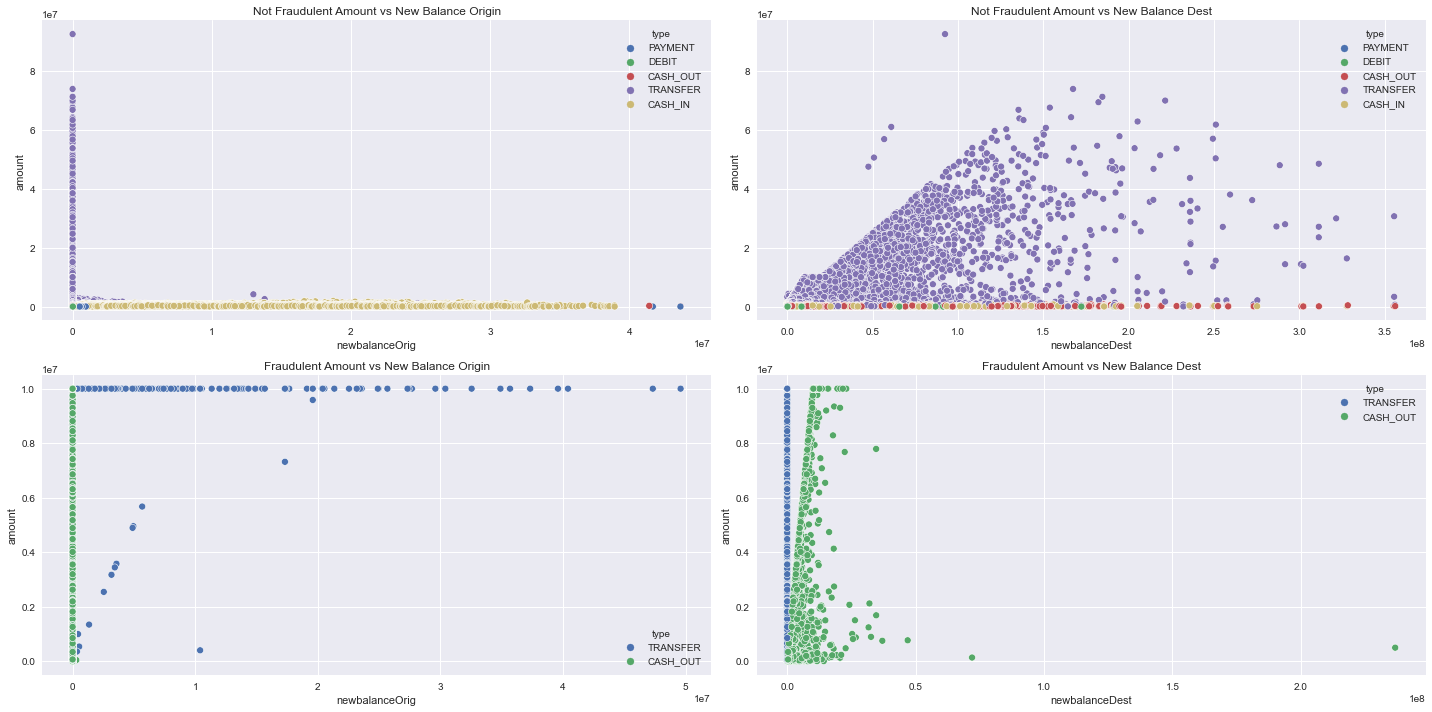

In [41]:
fig, axes = plt.subplots(2,2,figsize=(20,10)) 


sns.scatterplot(data = df_normal, ax=axes[0][0], x = 'newbalanceOrig', y='amount', hue='type')
axes[0][0].set_title('Not Fraudulent Amount vs New Balance Origin')

sns.scatterplot(data = df_normal, ax=axes[0][1], x = 'newbalanceDest', y='amount', hue='type')
axes[0][1].set_title('Not Fraudulent Amount vs New Balance Dest')

sns.scatterplot(data = df_frauds, ax=axes[1][0], x = 'newbalanceOrig', y='amount', hue='type')
axes[1][0].set_title('Fraudulent Amount vs New Balance Origin')

sns.scatterplot(data = df_frauds, ax=axes[1][1], x = 'newbalanceDest', y='amount', hue='type')
axes[1][1].set_title('Fraudulent Amount vs New Balance Dest')

plt.tight_layout()
plt.show()   

Vemos que o SaldoInicialDeOrigem parece ter uma relação bem definida com o valor em casos de fraude, em que para contas que tenham mais de 10.000.000 este é o valor transferido e para contas com menor valor em geral o valor disponível é transferido.

Em casos de fraude, para contas destino com maior saldo geralmente a fraude é através de saques, enquanto saldos menores geralmente recebem via transferência.

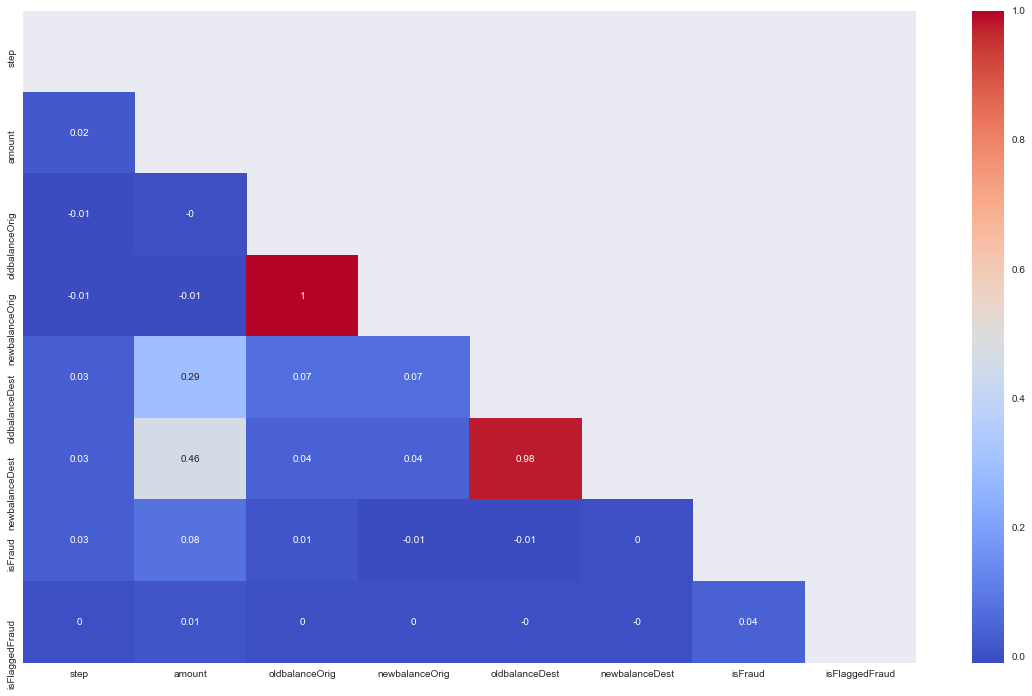

In [42]:
corr = df_treated.corr().round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm')
plt.show()

Como esperado pela relação conceitual entre as informações, o saldo de inicial e final é muito correlacinado, tanto para contas de origem quanto contas destino, enquanto para as demais features existem poucas relações.

Optaremos por manter ambos saldo inicial e final, por ajudarem a contar uma história, no entanto, seria interessante também explorar uma modelagem sem o saldo final.

## 6. Feature Engineering <a name="featureengineering"></a>

Realizaremos um pré processamento dos dados, para obter a melhor modelagem.

In [43]:
df_process = df_treated.copy()

In [44]:
df_process

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64000,C1231006815,170136.00000,160296.36000,M1979787155,0.00000,0.00000,0,0
1,1,PAYMENT,1864.28000,C1666544295,21249.00000,19384.72000,M2044282225,0.00000,0.00000,0,0
2,1,TRANSFER,181.00000,C1305486145,181.00000,0.00000,C553264065,0.00000,0.00000,1,0
3,1,CASH_OUT,181.00000,C840083671,181.00000,0.00000,C38997010,21182.00000,0.00000,1,0
4,1,PAYMENT,11668.14000,C2048537720,41554.00000,29885.86000,M1230701703,0.00000,0.00000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13000,C786484425,339682.13000,0.00000,C776919290,0.00000,339682.13000,1,0
6362616,743,TRANSFER,6311409.28000,C1529008245,6311409.28000,0.00000,C1881841831,0.00000,0.00000,1,0
6362617,743,CASH_OUT,6311409.28000,C1162922333,6311409.28000,0.00000,C1365125890,68488.84000,6379898.11000,1,0
6362618,743,TRANSFER,850002.52000,C1685995037,850002.52000,0.00000,C2080388513,0.00000,0.00000,1,0


Uma vez que a informação do step representa 1 hora, podemos criar novas features, como o dia do mês e o horário do dia em que aconteceu a transação.

In [45]:
df_process['day'] = (df_process['step']//24)+1

In [46]:
df_process['hour'] = (df_process['step']) - (df_process['day']-1)*24

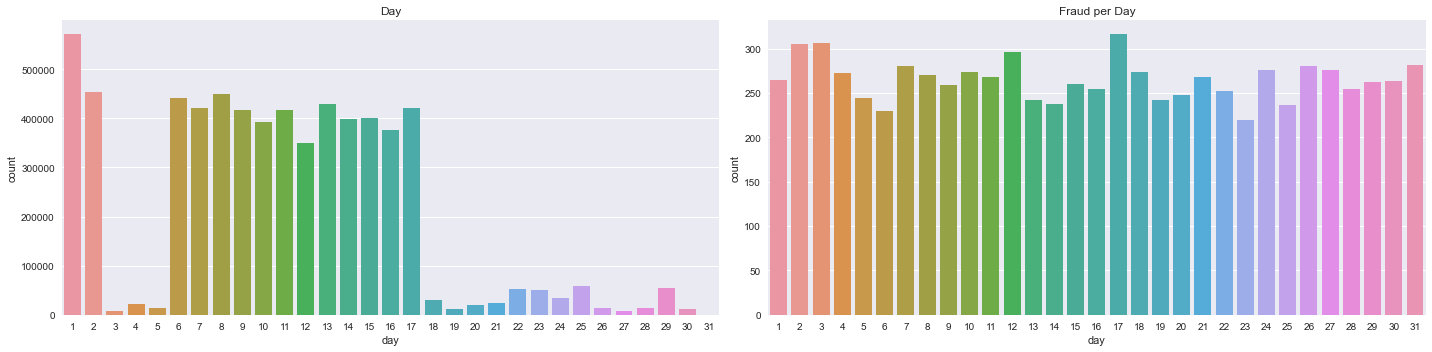

In [47]:
fig, axes = plt.subplots(1,2,figsize=(20,5)) 

sns.countplot(data = df_process, ax=axes[0], x = 'day')
axes[0].set_title('Day')

sns.countplot(data = df_process[df_process['isFraud']==1], ax=axes[1], x='day')
axes[1].set_title('Fraud per Day')

plt.tight_layout()
plt.show()   

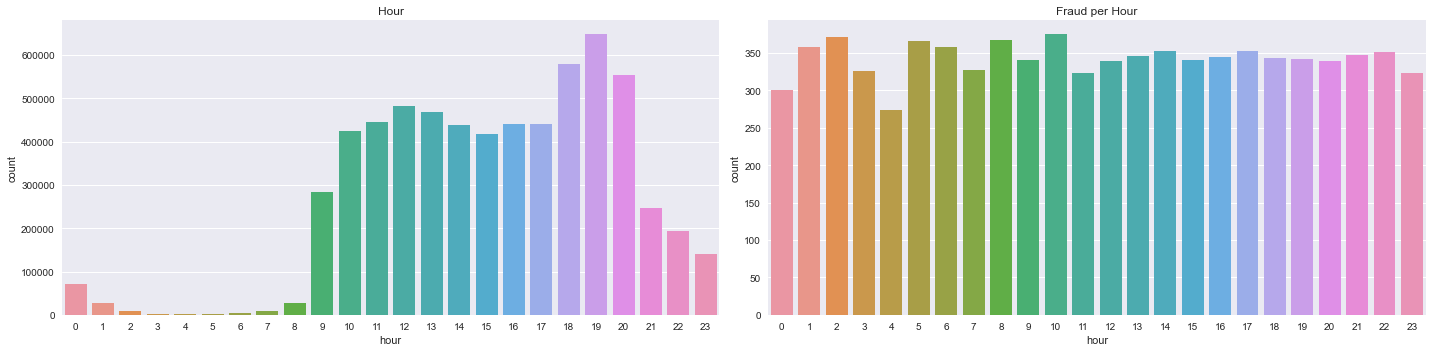

In [48]:
fig, axes = plt.subplots(1,2,figsize=(20,5)) 

sns.countplot(data = df_process, ax=axes[0], x = 'hour')
axes[0].set_title('Hour')

sns.countplot(data = df_process[df_process['isFraud']==1], ax=axes[1], x='hour')
axes[1].set_title('Fraud per Hour')

plt.tight_layout()
plt.show()   

É interessante observar que existe uma concentração de transação os dois primeiros dias e também entre o dia 6 e 17.

Da mesma forma, existe uma maior concentração de transações entre as 9h e 20h, o que é condizente com o que se espera.

No entanto, a mesma tendência não é observada nas fraudes, sendo realizadas de forma distribuida ao longo do mes e ao longo do dia. Assim, temos dias e horários em que a concentração de transações é maior, o que podem ser informações interessantes para a modelagem, assim, usaremos Dia e Hora ao invés do Step. 

Iremos também retirar a feature isFlaggedFraud, já que ela é pouco representativa dos dados fraudulentos e já é observada pelo banco.

In [49]:
df_process.drop('step', axis=1, inplace=True)

In [50]:
df_process.drop('isFlaggedFraud', axis=1, inplace=True)

Nosso modelo deve ser capaz de identificar contas diferentes, mesmo dentre contas que ele nunca viu até o momento, portanto, o labelencoding das contas será feito antes do split. Em uma situação real as contas seriam identificadas por de forma que pudessem ser diferenciadas pelo modelo.

In [51]:
label_encoder = LabelEncoder() 

In [52]:
df_process['nameOrig_encode'] = label_encoder.fit_transform(df_process['nameOrig']) 
df_process['nameDest_encode'] = label_encoder.fit_transform(df_process['nameDest']) 

In [53]:
df_process.drop(columns=['nameDest', 'nameOrig'], inplace=True)

O mesmo vale para a variável 'type', visto que existirão todos os tipos tanto no treino quanto teste.


In [54]:
df_process = pd.get_dummies(df_process, columns=["type"], prefix=["type_"])

In [55]:
df_process

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,day,hour,nameOrig_encode,nameDest_encode,type__CASH_IN,type__CASH_OUT,type__DEBIT,type__PAYMENT,type__TRANSFER
0,9839.64000,170136.00000,160296.36000,0.00000,0.00000,0,1,1,757869,1662094,0,0,0,1,0
1,1864.28000,21249.00000,19384.72000,0.00000,0.00000,0,1,1,2188998,1733924,0,0,0,1,0
2,181.00000,181.00000,0.00000,0.00000,0.00000,1,1,1,1002156,439685,0,0,0,0,1
3,181.00000,181.00000,0.00000,21182.00000,0.00000,1,1,1,5828262,391696,0,1,0,0,0
4,11668.14000,41554.00000,29885.86000,0.00000,0.00000,0,1,1,3445981,828919,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13000,339682.13000,0.00000,0.00000,339682.13000,1,31,23,5651847,505863,0,1,0,0,0
6362616,6311409.28000,6311409.28000,0.00000,0.00000,0.00000,1,31,23,1737278,260949,0,0,0,0,1
6362617,6311409.28000,6311409.28000,0.00000,68488.84000,6379898.11000,1,31,23,533958,108224,0,1,0,0,0
6362618,850002.52000,850002.52000,0.00000,0.00000,0.00000,1,31,23,2252932,319713,0,0,0,0,1


A partir deste ponto, para evitar data leakage, faremos o split antes de continuar o trabalho de feature engineering.

In [56]:
X = df_process.drop('isFraud', axis=1)
y = df_process['isFraud']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.33, 
                                                    stratify=y,
                                                    random_state = 42)

In [58]:
X_train

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,day,hour,nameOrig_encode,nameDest_encode,type__CASH_IN,type__CASH_OUT,type__DEBIT,type__PAYMENT,type__TRANSFER
1135722,246135.47000,15225.00000,0.00000,42751.95000,288887.41000,6,11,5835453,292876,0,1,0,0,0
1437333,99142.78000,0.00000,0.00000,254665.08000,353807.87000,6,20,778787,383260,0,1,0,0,0
2257519,5511.97000,166301.00000,171812.97000,104883.65000,99371.67000,8,19,947217,306845,1,0,0,0,0
5806166,506531.11000,107664.00000,614195.11000,4505008.95000,3998477.85000,17,17,2902635,215982,1,0,0,0,0
5455877,83717.62000,78209.00000,0.00000,0.00000,83717.62000,16,19,5203954,80400,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422253,175520.68000,977.00000,0.00000,91159.52000,266680.20000,6,19,1166733,298990,0,0,0,0,1
5834821,347110.99000,103785.00000,0.00000,87871.75000,434982.74000,17,18,5657454,228205,0,1,0,0,0
4182953,13259.63000,0.00000,0.00000,0.00000,0.00000,13,16,4857521,1891786,0,0,0,1,0
3985280,24122.92000,0.00000,0.00000,0.00000,0.00000,13,10,2732082,997852,0,0,0,1,0


Além do valor da transação, iremos também criar uma categorização, dividindo as transações entre valores extremamente baixos, baixos, moderados, altos e extremamente altos, utilizando os quartils e interquartil do dado de treino para a categorização.

In [59]:
Q1 = X_train['amount'].quantile(0.25)
Q2 = X_train['amount'].quantile(0.5) 
Q3 = X_train['amount'].quantile(0.75) 
Qmax = Q3 + (Q3-Q1)*1.5

In [60]:
def amount_category(x):
    if x >= Qmax:
        return('EXTREMLY HIGH')
    elif x < Qmax and x >= Q3:
        return('HIGH')
    elif x < Q3 and x >= Q2:
        return('MODERATE')
    elif x < Q2 and x >= Q1:
        return('LOW')
    elif x < Q1:
        return('EXTREMLY LOW')
X_train['amount_category'] = X_train['amount'].apply(amount_category)  
X_test['amount_category'] = X_test['amount'].apply(amount_category) 


In [61]:
X_train

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,day,hour,nameOrig_encode,nameDest_encode,type__CASH_IN,type__CASH_OUT,type__DEBIT,type__PAYMENT,type__TRANSFER,amount_category
1135722,246135.47000,15225.00000,0.00000,42751.95000,288887.41000,6,11,5835453,292876,0,1,0,0,0,HIGH
1437333,99142.78000,0.00000,0.00000,254665.08000,353807.87000,6,20,778787,383260,0,1,0,0,0,MODERATE
2257519,5511.97000,166301.00000,171812.97000,104883.65000,99371.67000,8,19,947217,306845,1,0,0,0,0,EXTREMLY LOW
5806166,506531.11000,107664.00000,614195.11000,4505008.95000,3998477.85000,17,17,2902635,215982,1,0,0,0,0,EXTREMLY HIGH
5455877,83717.62000,78209.00000,0.00000,0.00000,83717.62000,16,19,5203954,80400,0,1,0,0,0,MODERATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422253,175520.68000,977.00000,0.00000,91159.52000,266680.20000,6,19,1166733,298990,0,0,0,0,1,MODERATE
5834821,347110.99000,103785.00000,0.00000,87871.75000,434982.74000,17,18,5657454,228205,0,1,0,0,0,HIGH
4182953,13259.63000,0.00000,0.00000,0.00000,0.00000,13,16,4857521,1891786,0,0,0,1,0,EXTREMLY LOW
3985280,24122.92000,0.00000,0.00000,0.00000,0.00000,13,10,2732082,997852,0,0,0,1,0,LOW


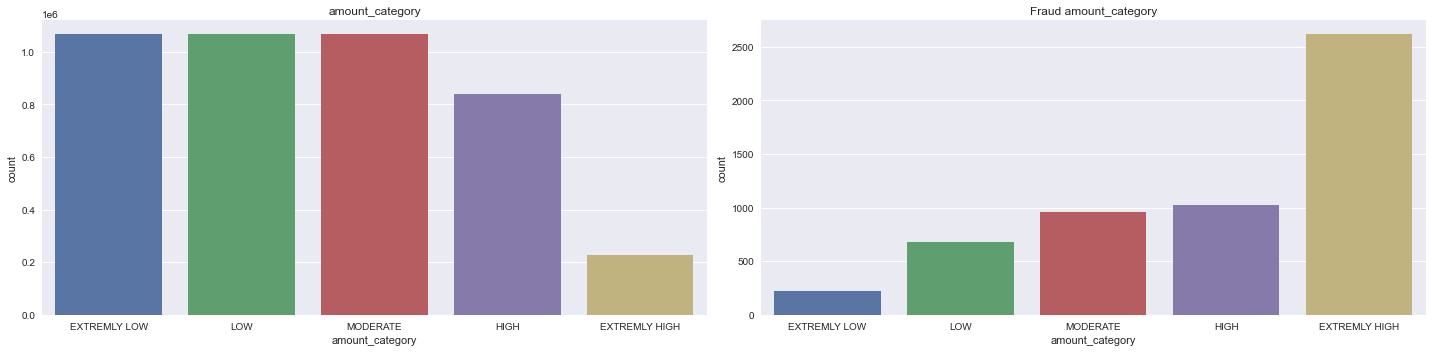

In [62]:
fig, axes = plt.subplots(1,2,figsize=(20,5)) 

sns.countplot(data = X_train, ax=axes[0], x = 'amount_category', 
              order = ['EXTREMLY LOW', 'LOW', 'MODERATE', 'HIGH', 'EXTREMLY HIGH'])
axes[0].set_title('amount_category')

sns.countplot(data = X_train[y_train==1], ax=axes[1], x='amount_category', 
              order = ['EXTREMLY LOW', 'LOW', 'MODERATE', 'HIGH', 'EXTREMLY HIGH'])
axes[1].set_title('Fraud amount_category')

plt.tight_layout()
plt.show()   

Podemos observar que claramente existe uma relação inversa entre os dados gerais e os dados fraudulentos, em que as fraudulentas se concentram ao redor nos valores extremamente altos.

Iremos realizar um ordinal encoding nesta variável, assim como normalizar as variáveis de saldo e de valor da transação.

In [63]:
X_train['amount_category'] = X_train['amount_category'].replace({'EXTREMLY LOW':1, 
                                                                       'LOW':2, 
                                                                       'MODERATE':3, 
                                                                       'HIGH':4, 
                                                                       'EXTREMLY HIGH':5})
X_test['amount_category'] = X_test['amount_category'].replace({'EXTREMLY LOW':1, 
                                                                       'LOW':2, 
                                                                       'MODERATE':3, 
                                                                       'HIGH':4, 
                                                                       'EXTREMLY HIGH':5})

In [64]:
normalizer = Normalizer()

In [65]:
X_train[['amount', 
              'oldbalanceOrig', 
              'newbalanceOrig', 
              'oldbalanceDest', 
              'newbalanceDest']] = normalizer.fit_transform(X_train[['amount', 
                                                                          'oldbalanceOrig', 
                                                                          'newbalanceOrig', 
                                                                          'oldbalanceDest', 
                                                                          'newbalanceDest']])
X_test[['amount', 
              'oldbalanceOrig', 
              'newbalanceOrig', 
              'oldbalanceDest', 
              'newbalanceDest']] = normalizer.transform(X_test[['amount', 
                                                                'oldbalanceOrig', 
                                                                'newbalanceOrig', 
                                                                'oldbalanceDest', 
                                                                'newbalanceDest']])

In [66]:
X_train

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,day,hour,nameOrig_encode,nameDest_encode,type__CASH_IN,type__CASH_OUT,type__DEBIT,type__PAYMENT,type__TRANSFER,amount_category
1135722,0.64395,0.03983,0.00000,0.11185,0.75580,6,11,5835453,292876,0,1,0,0,0,4
1437333,0.22177,0.00000,0.00000,0.56964,0.79141,6,20,778787,383260,0,1,0,0,0,3
2257519,0.01973,0.59514,0.61487,0.37535,0.35562,8,19,947217,306845,1,0,0,0,0,1
5806166,0.08335,0.01772,0.10107,0.74134,0.65798,17,17,2902635,215982,1,0,0,0,0,5
5455877,0.59000,0.55118,0.00000,0.00000,0.59000,16,19,5203954,80400,0,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422253,0.52865,0.00294,0.00000,0.27456,0.80321,6,19,1166733,298990,0,0,0,0,1,3
5834821,0.60591,0.18116,0.00000,0.15339,0.75929,17,18,5657454,228205,0,1,0,0,0,4
4182953,1.00000,0.00000,0.00000,0.00000,0.00000,13,16,4857521,1891786,0,0,0,1,0,1
3985280,1.00000,0.00000,0.00000,0.00000,0.00000,13,10,2732082,997852,0,0,0,1,0,2


In [67]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

## 7. Modelagem <a name="modelagem"></a>

Para a modelagem buscando detectar fraudes, criaremos diferentes modelos para explorar qual tem a melhor performance, explorando:
- Logistic Regression
- KNN
- Decision Tree
- Random Forest
- Gradient Boosting
- XGBoost

Além disso, faremos algumas abordagens:
- Baseline
- Movendo threshold
- Aplicando um class_weight
- Undersampling
- Oversampling
- SMOTE
- ADASYN

Não faremos uma exploração dos hiperparâmetros para tunar o modelo, tentando encontrar a melhor performance sem alterar os parâmetros iniciais. Em um caso real, em cada análise feita seria utilizado um Grid Search para se identificar os melhores parâmetros.

Uma vez que faremos rebalanceamento dos dados, vamos verificar a distribuição dos dados de treino inicialmente.

In [68]:
print('Dos {} dados de treino iniciais, {} são fraudes e {} não são fraudes, uma proporção de {}'.format(len(y_train), 
                                                    y_train[y_train==1].count(), 
                                                    y_train[y_train==0].count(), 
                                                    round(y_train[y_train==1].count()/y_train[y_train==0].count(), 4)))

Dos 4262955 dados de treino iniciais, 5503 são fraudes e 4257452 não são fraudes, uma proporção de 0.0013


Seria possível criar um 'for' que realizasse as diversas modelagens em uma única etapa, no entanto, para maior clareza, faremos cada etapa separadamente, comparando os dados no final. Para facilitar, utilizarei uma função que calcula e retorna as métricas do modelo, além de salvá-las numa lista que será utilizada para comparação dos modelos.

Para avaliar a performance do modelo, é necessário um input do time de negócios para entender aquela que melhor atende a instituição, podendo ser a com o maior AUC, a com o maior número de detecção de fraudes, menor número de falsos positivos, equilíbrio entre falsos positivos e falsos negativos. Seria possível, por exemplo, definir um limite máximo de falsos positivos aceitaveis - numa quantidade que seria possível uma logistica de se verificar a validade da operação -, tendando minimizar as fraudes. 

No caso, optaremos por otimizar o equilíbrio entre números absolutos de falsos positivos e falsos negativos, tendo minimizá-los. 

In [69]:
def metricas_classificação(model, y_pred, y_test):
    
    accuracy =  round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall =  round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    roc_auc = round(roc_auc_score(y_test, y_pred), 4)
    TN = confusion_matrix(y_test,y_pred)[0][0]
    FP = confusion_matrix(y_test,y_pred)[0][1]
    FN = confusion_matrix(y_test,y_pred)[1][0]
    TP = confusion_matrix(y_test,y_pred)[1][1]
    
    TN_list.append(TN)    
    FP_list.append(FP)    
    FN_list.append(FN)    
    TP_list.append(TP)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)
    
    print("Model: {}".format(model))
    print('\n')
    print("Accuracy: {}".format(accuracy))
    print("Precision: {}".format(precision))
    print("Recall: {}".format(recall))
    print("F1-Score: {}".format(f1))
    print("ROC AUC: {}".format(roc_auc))
    print('\nConfusion Matrix') 
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))

In [70]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
TN_list = []
FP_list = []
FN_list = []
TP_list = []

## Baseline

Os primeiros modelos servirão como um baseline de cada tipo de modelo, sem nenhuma alteração no threshold ou nos dados de treino.

In [71]:
lrc = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(objective = 'binary:logistic', random_state=42)

#### Logistic Regression

In [72]:
lrc.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [73]:
y_pred = lrc.predict(X_test)

In [74]:
metricas_classificação(lrc, y_pred, y_test)

Model: LogisticRegression(random_state=42)


Accuracy: 0.9987
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC: 0.5

Confusion Matrix
[[2096955       0]
 [   2710       0]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.00      0.00      0.00      2710

    accuracy                           1.00   2099665
   macro avg       0.50      0.50      0.50   2099665
weighted avg       1.00      1.00      1.00   2099665



#### KNN

In [75]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [76]:
y_pred = knn.predict(X_test)

In [77]:
metricas_classificação(knn, y_pred, y_test)

Model: KNeighborsClassifier()


Accuracy: 0.9987
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC: 0.5

Confusion Matrix
[[2096955       0]
 [   2710       0]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.00      0.00      0.00      2710

    accuracy                           1.00   2099665
   macro avg       0.50      0.50      0.50   2099665
weighted avg       1.00      1.00      1.00   2099665



#### Decision Tree

In [78]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [79]:
y_pred = dtc.predict(X_test)

In [80]:
metricas_classificação(dtc, y_pred, y_test)

Model: DecisionTreeClassifier(random_state=42)


Accuracy: 0.9997
Precision: 0.8895
Recall: 0.8882
F1-Score: 0.8888
ROC AUC: 0.944

Confusion Matrix
[[2096656     299]
 [    303    2407]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.89      0.89      0.89      2710

    accuracy                           1.00   2099665
   macro avg       0.94      0.94      0.94   2099665
weighted avg       1.00      1.00      1.00   2099665



#### Random Forest

In [81]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [82]:
y_pred = rfc.predict(X_test)

In [83]:
metricas_classificação(rfc, y_pred, y_test)

Model: RandomForestClassifier(random_state=42)


Accuracy: 0.9998
Precision: 0.9927
Recall: 0.8494
F1-Score: 0.9155
ROC AUC: 0.9247

Confusion Matrix
[[2096938      17]
 [    408    2302]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.99      0.85      0.92      2710

    accuracy                           1.00   2099665
   macro avg       1.00      0.92      0.96   2099665
weighted avg       1.00      1.00      1.00   2099665



#### Gradient Boosting

In [84]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [85]:
y_pred = gbc.predict(X_test)

In [86]:
metricas_classificação(gbc, y_pred, y_test)

Model: GradientBoostingClassifier(random_state=42)


Accuracy: 0.9989
Precision: 0.5769
Recall: 0.6007
F1-Score: 0.5886
ROC AUC: 0.8001

Confusion Matrix
[[2095761    1194]
 [   1082    1628]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.58      0.60      0.59      2710

    accuracy                           1.00   2099665
   macro avg       0.79      0.80      0.79   2099665
weighted avg       1.00      1.00      1.00   2099665



#### XGBoost

In [87]:
xgb.fit(X_train, y_train)

[16:23:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)

In [88]:
y_pred = xgb.predict(X_test)

In [89]:
metricas_classificação(xgb, y_pred, y_test)

Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)


Accuracy: 0.9999
Precision: 0.9835
Recall: 0.9033
F1-Score: 0.9417
ROC AUC: 0.9517

Confusion Matrix
[[2096914      41]
 [    262    2448]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.98      0.90      0.94      2710

    accuracy                           1.00  

#### Baseline Results

In [90]:
baseline_results=pd.DataFrame(list(zip(TN_list, FP_list, FN_list, TP_list, accuracy_list, precision_list, 
                                       recall_list, f1_list, roc_auc_list)),
                              columns=['TN', 'FP', 'FN', 'TP', 'Accuracy','Precision','Recall','F1 Score','ROC AUC'],
                              index=['Baseline Logistic Regression', 
                                     'Baseline KNN', 
                                     'Baseline Decision Tree',
                                     'Baseline Random Forest',
                                     'Baseline Gradient Boosting', 
                                     'Baseline XGBoost'])

Os modelos Logistic Regression e KNN não foram capazes de identificar nenhuma fraude, obtendo um AUC de 0.5, e zerando a precisão, recall e F1 score, mas mesmo assim obtiveram acurácia de 99.8%, o que deixa evidente que a acurácia não é uma boa métrica para ser utilizada. 

Os demais modelos foram capazes de detectar fraudes, com um destaque para XGBoost, com um F1 Score de 94.17% e recall de 90.33%.

In [91]:
baseline_results

,TN,FP,FN,TP,Accuracy,Precision,Recall,F1 Score,ROC AUC
Baseline Logistic Regression,2096955,0,2710,0,0.99870,0.00000,0.00000,0.00000,0.50000
Baseline KNN,2096955,0,2710,0,0.99870,0.00000,0.00000,0.00000,0.50000
Baseline Decision Tree,2096656,299,303,2407,0.99970,0.88950,0.88820,0.88880,0.94400
Baseline Random Forest,2096938,17,408,2302,0.99980,0.99270,0.84940,0.91550,0.92470
Baseline Gradient Boosting,2095761,1194,1082,1628,0.99890,0.57690,0.60070,0.58860,0.80010
Baseline XGBoost,2096914,41,262,2448,0.99990,0.98350,0.90330,0.94170,0.95170


## Movendo o Threshold

Os modelos são capazes de prever não só a classe, mas a probabilidade de pertencer à esta classe. Com base nessa informação e definindo um limite (threshold) divisor é que determina-se a classe que predita, isto é, alterar o nível de certeza necessário para se classificar um dado como pertencente à tal classe.

![FAR_FRR](https://www.recogtech.com/write/Afbeeldingen1/Kennisbank/FAR-FRR-EER-Biometrics-schema.jpg)
<center> Figura 1: Threshold de Equilíbrio [2]

Assim, é possível mover esse threshold, que usualmente é 0.5, para valores maiors ou menores, de forma a alterar a classificação e aumentar a quantidade de acertos ou erros na previsão de cada classe. Esta mudança é feita baseada na curva de FAR (False Acceptance Rate) e FRR (False Rejection Rate), ou seja, as falsamente classificadas como 1 e falsamente classificadas com 0.

Essa análise pode ser feita em cima dos números absolutos de erros ou dos erros percentuais. Como nossos dados são extremamente desbalanceados, vamos tentar equilibrar os erros absolutos. Para isso, faremos uso de uma função capaz de calcular e plotar a relação FAR e FRR absoluta, assim como retornar o threshold que melhor encontra o equilíbrio entre eles.

Faremos a avaliação de performance de cada modelo baseline com a aplicação do threshold que melhor equilibra a previsão.

In [92]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
TN_list = []
FP_list = []
FN_list = []
TP_list = []

In [93]:
def calculate_far_frr (y_proba , y_true, n_points =30, normalize =False, threshold =None, ylimit=1000):
    thr = np.linspace( 0, 1, n_points)
    far = []
    frr = []
    
    for t in thr:
        far_pt = y_proba[y_true == 0][:,1] >= t
        frr_pt = y_proba[y_true == 1][:,1] < t
        if normalize:
            far.append(far_pt.mean())
            frr.append(frr_pt.mean())
        else:
            far.append(far_pt.sum())
            frr.append(frr_pt.sum())
    if threshold is None:
        far = np.array(far)
        frr = np.array(frr)
        optm = thr[ abs(far - frr).argmin()]
    else:
        optm = threshold
    
    plot_data = pd.DataFrame(
        index=thr,
        data={
            'far': far,
            'frr': frr},
        dtype = float)
    
    plt.figure()
    sns.lineplot(data = plot_data, x=thr, y='far')
    sns.lineplot(data = plot_data, x=thr, y='frr')
    plt.title('FAR / FRR')
    plt.xlabel('Threshold')
    plt.ylabel('Mispredicted')
    plt.axvline(x = optm, color = 'r', linestyle = '--')
    plt.legend(['FAR', 'FRR', 'Threshold'])    
    plt.ylim([0, ylimit])
    
    return optm

#### Logistic Regression

In [94]:
y_proba = lrc.predict_proba(X_test)

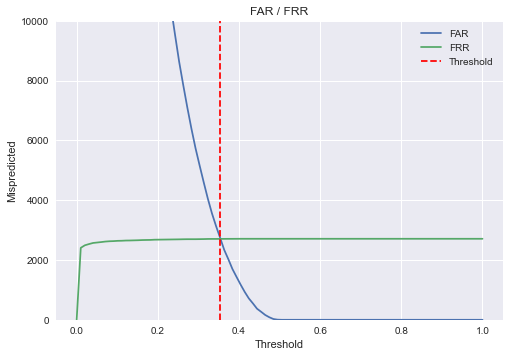

In [95]:
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 10000)

In [96]:
y_pred = lrc.predict(X_test)

In [97]:
for i in range(len(y_pred)):
    if y_proba[i,1]>=thresh:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [98]:
metricas_classificação(lrc, y_pred, y_test)

Model: LogisticRegression(random_state=42)


Accuracy: 0.9974
Precision: 0.0015
Recall: 0.0015
F1-Score: 0.0015
ROC AUC: 0.5001

Confusion Matrix
[[2094212    2743]
 [   2706       4]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.00      0.00      0.00      2710

    accuracy                           1.00   2099665
   macro avg       0.50      0.50      0.50   2099665
weighted avg       1.00      1.00      1.00   2099665



#### KNN

In [99]:
y_proba = knn.predict_proba(X_test)

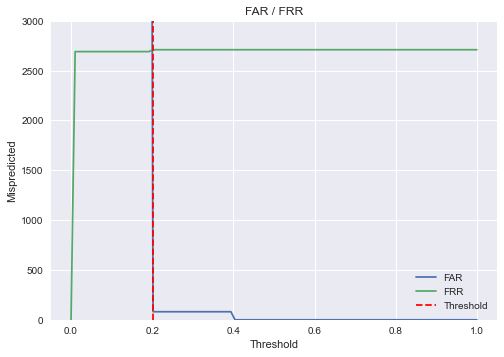

In [100]:
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 3000)

In [101]:
y_pred = knn.predict(X_test)

In [102]:
for i in range(len(y_pred)):
    if y_proba[i,1]>=thresh:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [103]:
metricas_classificação(lrc, y_pred, y_test)

Model: LogisticRegression(random_state=42)


Accuracy: 0.9987
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC: 0.5

Confusion Matrix
[[2096874      81]
 [   2710       0]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.00      0.00      0.00      2710

    accuracy                           1.00   2099665
   macro avg       0.50      0.50      0.50   2099665
weighted avg       1.00      1.00      1.00   2099665



#### Decision Tree

In [104]:
y_proba = dtc.predict_proba(X_test)

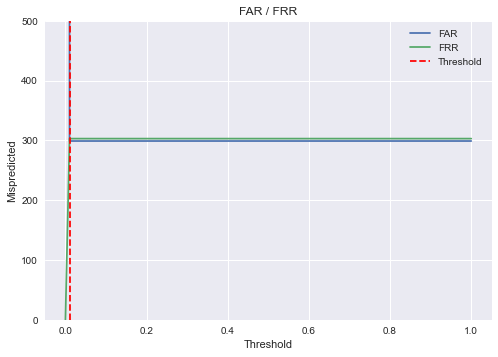

In [105]:
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 500)

In [106]:
y_pred = dtc.predict(X_test)

In [107]:
for i in range(len(y_pred)):
    if y_proba[i,1]>=thresh:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [108]:
metricas_classificação(dtc, y_pred, y_test)

Model: DecisionTreeClassifier(random_state=42)


Accuracy: 0.9997
Precision: 0.8895
Recall: 0.8882
F1-Score: 0.8888
ROC AUC: 0.944

Confusion Matrix
[[2096656     299]
 [    303    2407]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.89      0.89      0.89      2710

    accuracy                           1.00   2099665
   macro avg       0.94      0.94      0.94   2099665
weighted avg       1.00      1.00      1.00   2099665



#### Random Forest

In [109]:
y_proba = rfc.predict_proba(X_test)

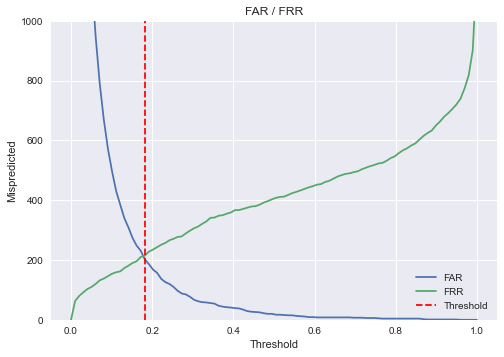

In [110]:
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 1000)

In [111]:
y_pred = rfc.predict(X_test)

In [112]:
for i in range(len(y_pred)):
    if y_proba[i,1]>=thresh:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [113]:
metricas_classificação(rfc, y_pred, y_test)

Model: RandomForestClassifier(random_state=42)


Accuracy: 0.9998
Precision: 0.9251
Recall: 0.9207
F1-Score: 0.9229
ROC AUC: 0.9603

Confusion Matrix
[[2096753     202]
 [    215    2495]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.93      0.92      0.92      2710

    accuracy                           1.00   2099665
   macro avg       0.96      0.96      0.96   2099665
weighted avg       1.00      1.00      1.00   2099665



#### Gradient Boosting

In [114]:
y_proba = gbc.predict_proba(X_test)

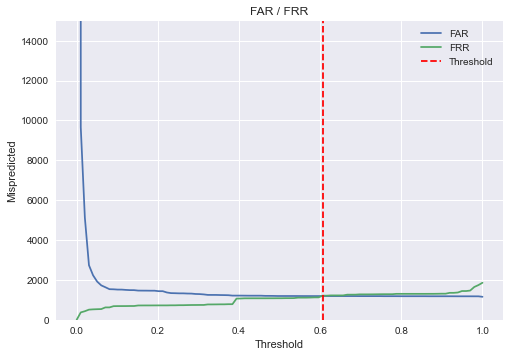

In [115]:
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 15000)

In [116]:
y_pred = gbc.predict(X_test)

In [117]:
for i in range(len(y_pred)):
    if y_proba[i,1]>=thresh:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [118]:
metricas_classificação(gbc, y_pred, y_test)

Model: GradientBoostingClassifier(random_state=42)


Accuracy: 0.9989
Precision: 0.5574
Recall: 0.5535
F1-Score: 0.5555
ROC AUC: 0.7765

Confusion Matrix
[[2095764    1191]
 [   1210    1500]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.56      0.55      0.56      2710

    accuracy                           1.00   2099665
   macro avg       0.78      0.78      0.78   2099665
weighted avg       1.00      1.00      1.00   2099665



#### XGBoost

In [119]:
y_proba = xgb.predict_proba(X_test)

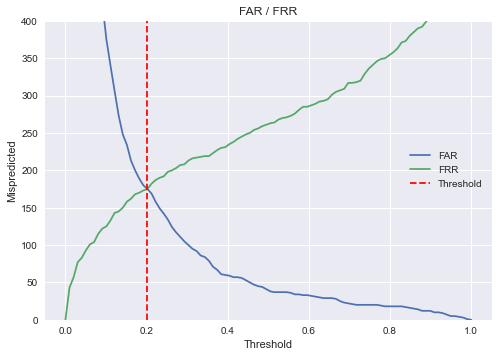

In [120]:
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 400)

In [121]:
y_pred = xgb.predict(X_test)

In [122]:
for i in range(len(y_pred)):
    if y_proba[i,1]>=thresh:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [123]:
metricas_classificação(xgb, y_pred, y_test)

Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)


Accuracy: 0.9998
Precision: 0.9354
Recall: 0.9354
F1-Score: 0.9354
ROC AUC: 0.9677

Confusion Matrix
[[2096780     175]
 [    175    2535]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.94      0.94      0.94      2710

    accuracy                           1.00  

#### Threshold resuls 

In [124]:
th_results=pd.DataFrame(list(zip(TN_list, FP_list, FN_list, TP_list, accuracy_list, precision_list, 
                                 recall_list, f1_list, roc_auc_list)),
                              columns=['TN', 'FP', 'FN', 'TP', 'Accuracy','Precision','Recall','F1 Score','ROC AUC'],
                              index=['Threshold Logistic Regression',  
                                     'Threshold KNN',
                                     'Threshold Decision Tree',
                                     'Threshold Random Forest',
                                     'Threshold Gradient Boosting',
                                     'Threshold XGBoost'])

A mudança do threshold para o ponto onde há maior equilíbrio entre o FAR e FRR foi possível para alguns modelos.

No caso dos modelos Logistic Regression não existia um ponto de equilíbrio, de modo que o LR foi capaz de prever apenas 4 fraudes, em troca de 2743 transações normais classificadas como fraude, enquanto o KNN seguiu não identificando fraudes e ainda classificou erroneamente 81 transações normais.

Nos demais modelos um equilíbrio maior entre Falsos Positivos e Falsos Negativos foi atingido. Novamente, o modelo XGBoost teve a melhor performance, com um aumento do ROC AUC e um maior equlíbrio entre precisão e recall, apesar de uma redução do F1 Score. O modelo Random Forest também performou bem, tendo uma grande melhora em relação ao modelo padrão, com um aumento no ROC AUC, F1 Score e recall.

Para o Decision Tree, é interessante observar pelo gráfico que não há muito controle, não há uma grande mudança nos erros para diferentes thresholds.

O Gradiend Boosting, apesar de ser capaz de detectar 1500 fraudes, ainda ficou muito abaixo da performance dos demais modelos.

In [125]:
th_results

,TN,FP,FN,TP,Accuracy,Precision,Recall,F1 Score,ROC AUC
Threshold Logistic Regression,2094212,2743,2706,4,0.99740,0.00150,0.00150,0.00150,0.50010
Threshold KNN,2096874,81,2710,0,0.99870,0.00000,0.00000,0.00000,0.50000
Threshold Decision Tree,2096656,299,303,2407,0.99970,0.88950,0.88820,0.88880,0.94400
Threshold Random Forest,2096753,202,215,2495,0.99980,0.92510,0.92070,0.92290,0.96030
Threshold Gradient Boosting,2095764,1191,1210,1500,0.99890,0.55740,0.55350,0.55550,0.77650
Threshold XGBoost,2096780,175,175,2535,0.99980,0.93540,0.93540,0.93540,0.96770


## Class Weight

Class Weight é um parâmetro do modelo, que pode ser aplicado no casos dos modelos abaixo. 

Ele permite que o modelo dê maior peso para determinada classe em relação à outra, fato que pode auxiliar a performance em certos dados desbalanceados.

In [126]:
lrc_cw = LogisticRegression(random_state=42, class_weight='balanced')
dtc_cw = DecisionTreeClassifier(random_state=42, class_weight='balanced')
rfc_cw = RandomForestClassifier(random_state=42, class_weight='balanced')
xgb_cw = XGBClassifier(objective = 'binary:logistic', random_state=42, class_weight='balanced')

In [127]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
TN_list = []
FP_list = []
FN_list = []
TP_list = []

#### Logistic Regression

In [128]:
lrc_cw.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [129]:
y_pred = lrc_cw.predict(X_test)

In [130]:
metricas_classificação(lrc_cw, y_pred, y_test)

Model: LogisticRegression(class_weight='balanced', random_state=42)


Accuracy: 0.6176
Precision: 0.0019
Recall: 0.5705
F1-Score: 0.0038
ROC AUC: 0.5941

Confusion Matrix
[[1295198  801757]
 [   1164    1546]]


              precision    recall  f1-score   support

           0       1.00      0.62      0.76   2096955
           1       0.00      0.57      0.00      2710

    accuracy                           0.62   2099665
   macro avg       0.50      0.59      0.38   2099665
weighted avg       1.00      0.62      0.76   2099665



In [131]:
y_proba = lrc_cw.predict_proba(X_test)

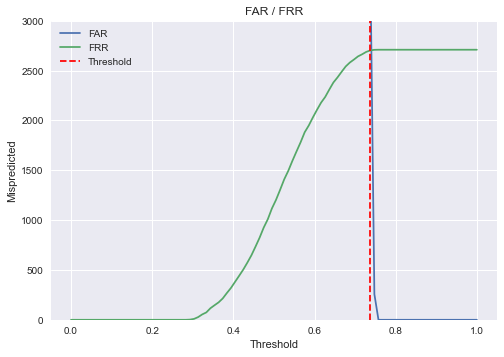

In [132]:
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 3000)

#### Decision Tree

In [133]:
dtc_cw.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [134]:
y_pred = dtc_cw.predict(X_test)

In [135]:
metricas_classificação(dtc_cw, y_pred, y_test)

Model: DecisionTreeClassifier(class_weight='balanced', random_state=42)


Accuracy: 0.9997
Precision: 0.9067
Recall: 0.879
F1-Score: 0.8926
ROC AUC: 0.9394

Confusion Matrix
[[2096710     245]
 [    328    2382]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.91      0.88      0.89      2710

    accuracy                           1.00   2099665
   macro avg       0.95      0.94      0.95   2099665
weighted avg       1.00      1.00      1.00   2099665



In [136]:
y_proba = dtc_cw.predict_proba(X_test)

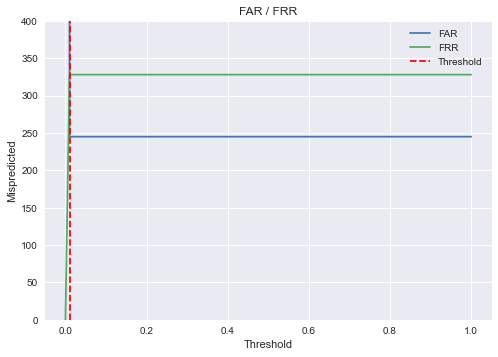

In [137]:
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 400)

#### Random Forest

In [138]:
rfc_cw.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [139]:
y_pred = rfc_cw.predict(X_test)

In [140]:
metricas_classificação(rfc_cw, y_pred, y_test)

Model: RandomForestClassifier(class_weight='balanced', random_state=42)


Accuracy: 0.9998
Precision: 0.991
Recall: 0.8509
F1-Score: 0.9156
ROC AUC: 0.9255

Confusion Matrix
[[2096934      21]
 [    404    2306]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.99      0.85      0.92      2710

    accuracy                           1.00   2099665
   macro avg       1.00      0.93      0.96   2099665
weighted avg       1.00      1.00      1.00   2099665



In [141]:
y_proba = rfc_cw.predict_proba(X_test)

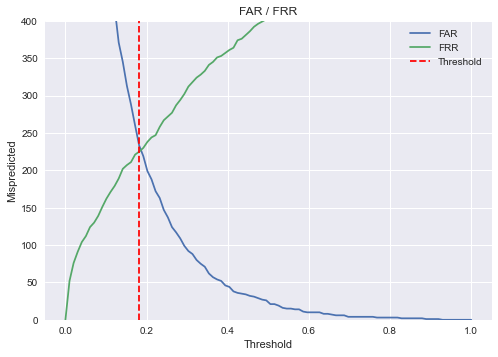

In [142]:
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 400)

In [143]:
for i in range(len(y_pred)):
    if y_proba[i,1]>=thresh:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [144]:
metricas_classificação(rfc_cw, y_pred, y_test)

Model: RandomForestClassifier(class_weight='balanced', random_state=42)


Accuracy: 0.9998
Precision: 0.9143
Recall: 0.917
F1-Score: 0.9156
ROC AUC: 0.9584

Confusion Matrix
[[2096722     233]
 [    225    2485]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.91      0.92      0.92      2710

    accuracy                           1.00   2099665
   macro avg       0.96      0.96      0.96   2099665
weighted avg       1.00      1.00      1.00   2099665



#### XGBoost

In [145]:
xgb_cw.fit(X_train, y_train)

[16:58:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:58:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='approx', validate_parameters=1,
              verbosity=None)

In [146]:
y_pred = xgb_cw.predict(X_test)

In [147]:
metricas_classificação(xgb_cw, y_pred, y_test)

Model: XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='approx', validate_parameters=1,
              verbosity=None)


Accuracy: 0.9999
Precision: 0.9835
Recall: 0.9033
F1-Score: 0.9417
ROC AUC: 0.9517

Confusion Matrix
[[2096914      41]
 [    262    2448]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.98      0.90      0.94      2710

    ac

In [148]:
y_proba = xgb_cw.predict_proba(X_test)

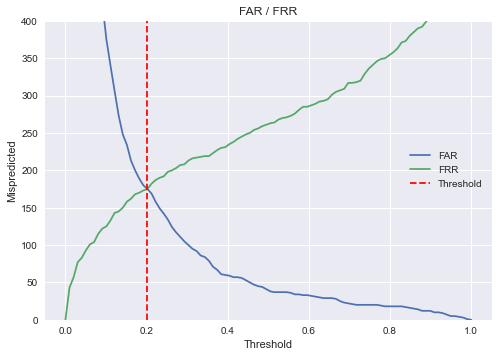

In [149]:
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 400)

In [150]:
for i in range(len(y_pred)):
    if y_proba[i,1]>=thresh:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [151]:
metricas_classificação(xgb_cw, y_pred, y_test)

Model: XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='approx', validate_parameters=1,
              verbosity=None)


Accuracy: 0.9998
Precision: 0.9354
Recall: 0.9354
F1-Score: 0.9354
ROC AUC: 0.9677

Confusion Matrix
[[2096780     175]
 [    175    2535]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.94      0.94      0.94      2710

    ac

#### Class Weight Results

In [152]:
cw_results=pd.DataFrame(list(zip(TN_list, FP_list, FN_list, TP_list, accuracy_list, precision_list, 
                                 recall_list, f1_list, roc_auc_list)),
                              columns=['TN', 'FP', 'FN', 'TP', 'Accuracy','Precision','Recall','F1 Score','ROC AUC'],
                              index=['ClassWeight Logistic Regression', 
                                     'ClassWeight Decision Tree',
                                     'ClassWeight Random Forest',
                                     'ClassWeight+Threshold Random Forest',
                                     'ClassWeight XGBoost',
                                     'ClassWeight+Threshold XGBoost'])

Em relação aos dados obtidos anteriormente, o que chama maior atenção é o fato de que com o Class Weight a Logistic Regression foi capaz de identificar 1546 fraudes, com um recall de 57%, no entanto, isso foi obtido com a perda de mais de 800.000 transações reais, troca que não é coerente, se mostrando um modelo não eficiente.

In [153]:
cw_results

,TN,FP,FN,TP,Accuracy,Precision,Recall,F1 Score,ROC AUC
ClassWeight Logistic Regression,1295198,801757,1164,1546,0.61760,0.00190,0.57050,0.00380,0.59410
ClassWeight Decision Tree,2096710,245,328,2382,0.99970,0.90670,0.87900,0.89260,0.93940
ClassWeight Random Forest,2096934,21,404,2306,0.99980,0.99100,0.85090,0.91560,0.92550
ClassWeight+Threshold Random Forest,2096722,233,225,2485,0.99980,0.91430,0.91700,0.91560,0.95840
ClassWeight XGBoost,2096914,41,262,2448,0.99990,0.98350,0.90330,0.94170,0.95170
ClassWeight+Threshold XGBoost,2096780,175,175,2535,0.99980,0.93540,0.93540,0.93540,0.96770


## Undersampling

Uma abordagem para se obter um dataset de treino mais balanceado é realizar um undersampling, uma reamostragem em que se reduz a quantidade de amostras da classe predominante. Utilizaremos a função RandomUndersampler para se obter uma reamostragem aleatória. Essa estratégia reduz os dados utilizados para a classe predominante, mantendo os dados existentes para a classe rara.

Uma vez que temos poucas features e muitos dados, essa abordagem tende a ter um bom desempenho, por existirem diversos dados que juntos podem servir como boa representação do dataset completo.

![Undersampling](https://i1.wp.com/dataaspirant.com/wp-content/uploads/2020/08/17-undersampling.png)
<center> Figura 2: Undersampling [3]

In [154]:
X_undsamp, y_undsamp= RandomUnderSampler(random_state=42, sampling_strategy=0.006).fit_resample(X_train, y_train)

In [155]:
print('Dos {} dados de treino com undersampling, {} são fraudes e {} não são fraudes, uma proporção de {}'.format(
                                        len(y_undsamp), 
                                        y_undsamp[y_undsamp==1].count(), 
                                        y_undsamp[y_undsamp==0].count(),
                                        round(y_undsamp[y_undsamp==1].count()/y_undsamp[y_undsamp==0].count(), 4)))

Dos 922669 dados de treino com undersampling, 5503 são fraudes e 917166 não são fraudes, uma proporção de 0.006


In [156]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
TN_list = []
FP_list = []
FN_list = []
TP_list = []

In [157]:
lrc_und = LogisticRegression(random_state=42)
knn_und = KNeighborsClassifier()
dtc_und = DecisionTreeClassifier(random_state=42)
rfc_und = RandomForestClassifier(random_state=42)
gbc_und = GradientBoostingClassifier(random_state=42)
xgb_und = XGBClassifier(objective = 'binary:logistic', random_state=42)

#### Logistic Regression

In [158]:
lrc_und.fit(X_undsamp, y_undsamp)

LogisticRegression(random_state=42)

In [159]:
y_pred = lrc_und.predict(X_test)

In [160]:
metricas_classificação(lrc_und, y_pred, y_test)

Model: LogisticRegression(random_state=42)


Accuracy: 0.9987
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC: 0.5

Confusion Matrix
[[2096955       0]
 [   2710       0]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.00      0.00      0.00      2710

    accuracy                           1.00   2099665
   macro avg       0.50      0.50      0.50   2099665
weighted avg       1.00      1.00      1.00   2099665



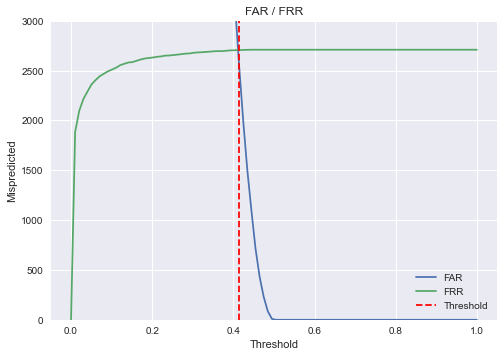

In [161]:
y_proba = lrc_und.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 3000)

#### KNN

In [162]:
knn_und.fit(X_undsamp, y_undsamp)

KNeighborsClassifier()

In [163]:
y_pred = knn_und.predict(X_test)

In [164]:
metricas_classificação(knn_und, y_pred, y_test)

Model: KNeighborsClassifier()


Accuracy: 0.9987
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC: 0.5

Confusion Matrix
[[2096941      14]
 [   2710       0]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.00      0.00      0.00      2710

    accuracy                           1.00   2099665
   macro avg       0.50      0.50      0.50   2099665
weighted avg       1.00      1.00      1.00   2099665



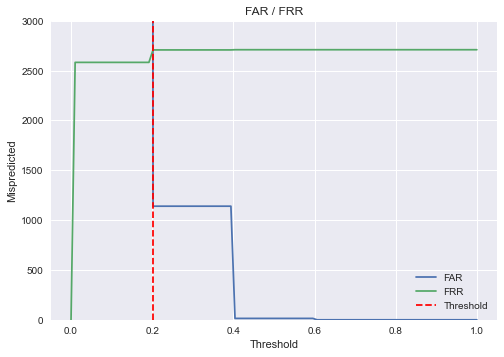

In [165]:
y_proba = knn_und.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 3000)

#### Decision Tree

In [166]:
dtc_und.fit(X_undsamp, y_undsamp)

DecisionTreeClassifier(random_state=42)

In [167]:
y_pred = dtc_und.predict(X_test)

In [168]:
metricas_classificação(dtc_und, y_pred, y_test)

Model: DecisionTreeClassifier(random_state=42)


Accuracy: 0.9994
Precision: 0.7215
Recall: 0.9236
F1-Score: 0.8102
ROC AUC: 0.9616

Confusion Matrix
[[2095989     966]
 [    207    2503]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.72      0.92      0.81      2710

    accuracy                           1.00   2099665
   macro avg       0.86      0.96      0.90   2099665
weighted avg       1.00      1.00      1.00   2099665



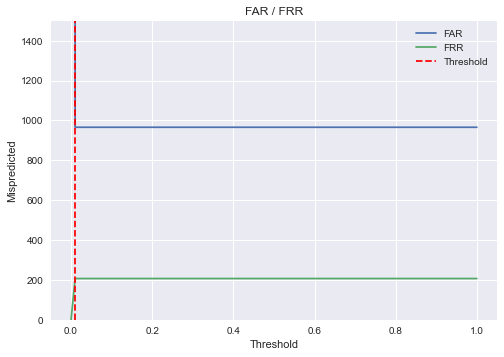

In [169]:
y_proba = dtc_und.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 1500)

#### Random Forest

In [170]:
rfc_und.fit(X_undsamp, y_undsamp)

RandomForestClassifier(random_state=42)

In [171]:
y_pred = rfc_und.predict(X_test)

In [172]:
metricas_classificação(rfc_und, y_pred, y_test)

Model: RandomForestClassifier(random_state=42)


Accuracy: 0.9998
Precision: 0.9589
Recall: 0.8867
F1-Score: 0.9214
ROC AUC: 0.9433

Confusion Matrix
[[2096852     103]
 [    307    2403]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.96      0.89      0.92      2710

    accuracy                           1.00   2099665
   macro avg       0.98      0.94      0.96   2099665
weighted avg       1.00      1.00      1.00   2099665



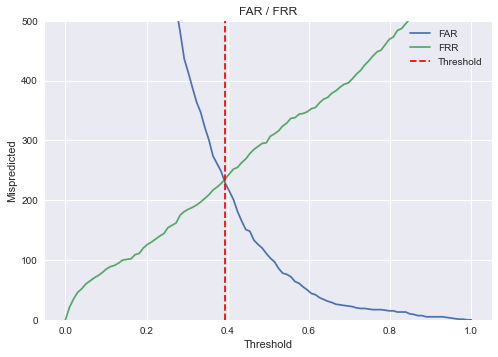

In [173]:
y_proba = rfc_und.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 500)

In [174]:
for i in range(len(y_pred)):
    if y_proba[i,1]>=thresh:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [175]:
metricas_classificação(rfc_und, y_pred, y_test)

Model: RandomForestClassifier(random_state=42)


Accuracy: 0.9998
Precision: 0.9156
Recall: 0.9129
F1-Score: 0.9143
ROC AUC: 0.9564

Confusion Matrix
[[2096727     228]
 [    236    2474]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.92      0.91      0.91      2710

    accuracy                           1.00   2099665
   macro avg       0.96      0.96      0.96   2099665
weighted avg       1.00      1.00      1.00   2099665



#### Gradient Boosting

In [176]:
gbc_und.fit(X_undsamp, y_undsamp)

GradientBoostingClassifier(random_state=42)

In [177]:
y_pred = gbc_und.predict(X_test)

In [178]:
metricas_classificação(gbc_und, y_pred, y_test)

Model: GradientBoostingClassifier(random_state=42)


Accuracy: 0.9997
Precision: 0.9333
Recall: 0.8362
F1-Score: 0.8821
ROC AUC: 0.918

Confusion Matrix
[[2096793     162]
 [    444    2266]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.93      0.84      0.88      2710

    accuracy                           1.00   2099665
   macro avg       0.97      0.92      0.94   2099665
weighted avg       1.00      1.00      1.00   2099665



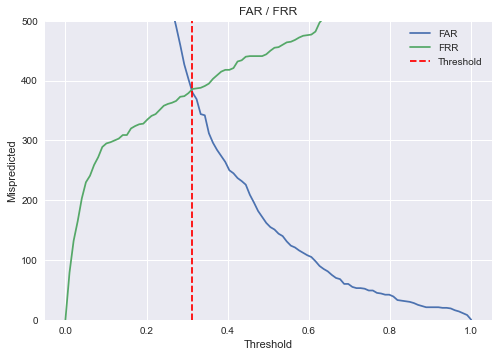

In [179]:
y_proba = gbc_und.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 500)

In [180]:
for i in range(len(y_pred)):
    if y_proba[i,1]>=thresh:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [181]:
metricas_classificação(gbc_und, y_pred, y_test)

Model: GradientBoostingClassifier(random_state=42)


Accuracy: 0.9996
Precision: 0.8595
Recall: 0.8576
F1-Score: 0.8585
ROC AUC: 0.9287

Confusion Matrix
[[2096575     380]
 [    386    2324]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.86      0.86      0.86      2710

    accuracy                           1.00   2099665
   macro avg       0.93      0.93      0.93   2099665
weighted avg       1.00      1.00      1.00   2099665



#### XGBoost

In [182]:
xgb_und.fit(X_undsamp, y_undsamp)

[17:22:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [183]:
y_pred = xgb_und.predict(X_test)

In [184]:
metricas_classificação(xgb_und, y_pred, y_test)

Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


Accuracy: 0.9998
Precision: 0.9358
Recall: 0.9354
F1-Score: 0.9356
ROC AUC: 0.9677

Confusion Matrix
[[2096781     174]
 [    175    2535]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.94      0.94      0.94      2710

    accuracy                           1.00   

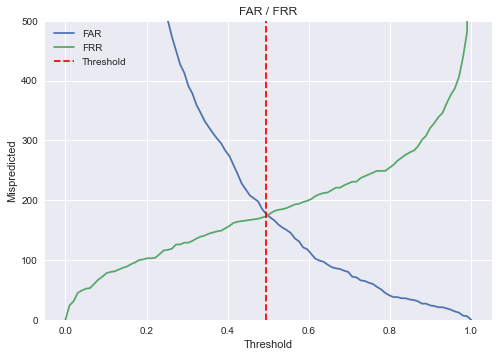

In [185]:
y_proba = xgb_und.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 500)

In [186]:
for i in range(len(y_pred)):
    if y_proba[i,1]>=thresh:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [187]:
metricas_classificação(xgb_und, y_pred, y_test)

Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


Accuracy: 0.9998
Precision: 0.9348
Recall: 0.9362
F1-Score: 0.9355
ROC AUC: 0.968

Confusion Matrix
[[2096778     177]
 [    173    2537]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.93      0.94      0.94      2710

    accuracy                           1.00   2

#### Undersampling Results

In [188]:
undersampling_results=pd.DataFrame(list(zip(TN_list, FP_list, FN_list, TP_list, accuracy_list, precision_list, 
                                            recall_list, f1_list, roc_auc_list)),
                              columns=['TN', 'FP', 'FN', 'TP', 'Accuracy','Precision','Recall','F1 Score','ROC AUC'],
                              index=['Undersampling Logistic Regression',
                                     'Undersampling KNN',   
                                     'Undersampling Decision Tree',                                    
                                     'Undersampling Random Forest',
                                     'Undersampling+Threshold Random Forest',
                                     'Undersampling Gradient Boosting', 
                                     'Undersampling+Threshold Gradient Boosting',
                                     'Undersampling XGBoost', 
                                     'Undersampling+Threshold XGBoost'])

A reamostragem undersampling teve um resultado ligeiramente superior ao baseline para o XGBoost, além de ter uma excelente melhora no modelo Gradient Boosting.

A árvore de decisão, no entanto, apresentou uma significativa piora, classificando errôneamente mais transações normais, apesar de umamelhora no recall. Esta troca, no entanto, foi feita com sacríficio de precisão, que não seria aceito pelo time de negócios.

In [189]:
undersampling_results

,TN,FP,FN,TP,Accuracy,Precision,Recall,F1 Score,ROC AUC
Undersampling Logistic Regression,2096955,0,2710,0,0.99870,0.00000,0.00000,0.00000,0.50000
Undersampling KNN,2096941,14,2710,0,0.99870,0.00000,0.00000,0.00000,0.50000
Undersampling Decision Tree,2095989,966,207,2503,0.99940,0.72150,0.92360,0.81020,0.96160
Undersampling Random Forest,2096852,103,307,2403,0.99980,0.95890,0.88670,0.92140,0.94330
Undersampling+Threshold Random Forest,2096727,228,236,2474,0.99980,0.91560,0.91290,0.91430,0.95640
Undersampling Gradient Boosting,2096793,162,444,2266,0.99970,0.93330,0.83620,0.88210,0.91800
Undersampling+Threshold Gradient Boosting,2096575,380,386,2324,0.99960,0.85950,0.85760,0.85850,0.92870
Undersampling XGBoost,2096781,174,175,2535,0.99980,0.93580,0.93540,0.93560,0.96770
Undersampling+Threshold XGBoost,2096778,177,173,2537,0.99980,0.93480,0.93620,0.93550,0.96800


## Oversampling

O oversampling é uma técnica de reamostragem inversa ao undersampling, onde ao invés de reduzir a classe dominante, a classe rara é reproduzida diversas vezes de modo a aumentar sua proporção, sem no entanto criar novos dados, portanto, repetindo o mesmo dado múltiplas vezes no treino.

![Oversampling](https://i0.wp.com/dataaspirant.com/wp-content/uploads/2020/08/10-oversampling.png)
<center> Figura 3: Oversampling [4]

In [190]:
X_ovsamp, y_ovsamp = RandomOverSampler(random_state=42, sampling_strategy=0.006).fit_resample(X_train, y_train)

In [191]:
print('Dos {} dados de treino com oversampling, {} são fraudes e {} não são fraudes, uma proporção de {}'.format(
                                        len(y_ovsamp), 
                                        y_ovsamp[y_ovsamp==1].count(), 
                                        y_ovsamp[y_ovsamp==0].count(),
                                        round(y_ovsamp[y_ovsamp==1].count()/y_ovsamp[y_ovsamp==0].count(), 4)))

Dos 4282996 dados de treino com undersampling, 25544 são fraudes e 4257452 não são fraudes, uma proporção de 0.006


In [192]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
TN_list = []
FP_list = []
FN_list = []
TP_list = []

In [193]:
lrc_ov = LogisticRegression(random_state=42)
knn_ov = KNeighborsClassifier()
dtc_ov = DecisionTreeClassifier(random_state=42)
rfc_ov = RandomForestClassifier(random_state=42)
gbc_ov = GradientBoostingClassifier(random_state=42)
xgb_ov = XGBClassifier(objective = 'binary:logistic', random_state=42)

#### Logistic Regression

In [194]:
lrc_ov.fit(X_ovsamp, y_ovsamp)

LogisticRegression(random_state=42)

In [195]:
y_pred = lrc_ov.predict(X_test)

In [196]:
metricas_classificação(lrc_ov, y_pred, y_test)

Model: LogisticRegression(random_state=42)


Accuracy: 0.9987
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC: 0.5

Confusion Matrix
[[2096955       0]
 [   2710       0]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.00      0.00      0.00      2710

    accuracy                           1.00   2099665
   macro avg       0.50      0.50      0.50   2099665
weighted avg       1.00      1.00      1.00   2099665



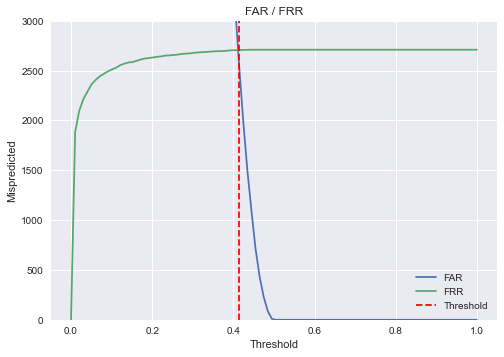

In [197]:
y_proba = lrc_ov.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 3000)

#### KNN

In [198]:
knn_ov.fit(X_ovsamp, y_ovsamp)

KNeighborsClassifier()

In [199]:
y_pred = knn_ov.predict(X_test)

In [200]:
metricas_classificação(knn_ov, y_pred, y_test)

Model: KNeighborsClassifier()


Accuracy: 0.9953
Precision: 0.0015
Recall: 0.0041
F1-Score: 0.0022
ROC AUC: 0.5003

Confusion Matrix
[[2089694    7261]
 [   2699      11]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.00      0.00      0.00      2710

    accuracy                           1.00   2099665
   macro avg       0.50      0.50      0.50   2099665
weighted avg       1.00      1.00      1.00   2099665



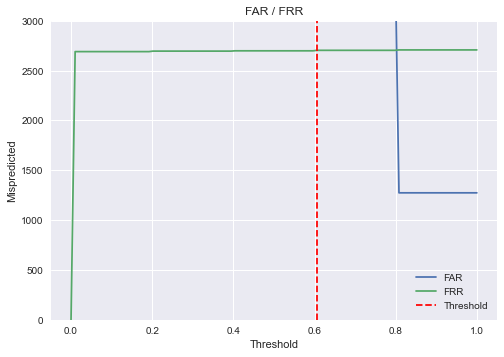

In [201]:
y_proba = knn_ov.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 3000)

#### Decision Tree

In [202]:
dtc_ov.fit(X_ovsamp, y_ovsamp)

DecisionTreeClassifier(random_state=42)

In [203]:
y_pred = dtc_ov.predict(X_test)

In [204]:
metricas_classificação(dtc_ov, y_pred, y_test)

Model: DecisionTreeClassifier(random_state=42)


Accuracy: 0.9997
Precision: 0.9002
Recall: 0.8919
F1-Score: 0.896
ROC AUC: 0.9459

Confusion Matrix
[[2096687     268]
 [    293    2417]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.90      0.89      0.90      2710

    accuracy                           1.00   2099665
   macro avg       0.95      0.95      0.95   2099665
weighted avg       1.00      1.00      1.00   2099665



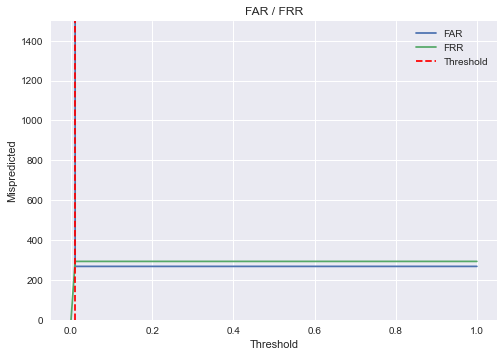

In [205]:
y_proba = dtc_ov.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 1500)

#### Random Forest

In [206]:
rfc_ov.fit(X_ovsamp, y_ovsamp)

RandomForestClassifier(random_state=42)

In [207]:
y_pred = rfc_ov.predict(X_test)

In [208]:
metricas_classificação(rfc_ov, y_pred, y_test)

Model: RandomForestClassifier(random_state=42)


Accuracy: 0.9998
Precision: 0.9854
Recall: 0.8697
F1-Score: 0.924
ROC AUC: 0.9349

Confusion Matrix
[[2096920      35]
 [    353    2357]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.99      0.87      0.92      2710

    accuracy                           1.00   2099665
   macro avg       0.99      0.93      0.96   2099665
weighted avg       1.00      1.00      1.00   2099665



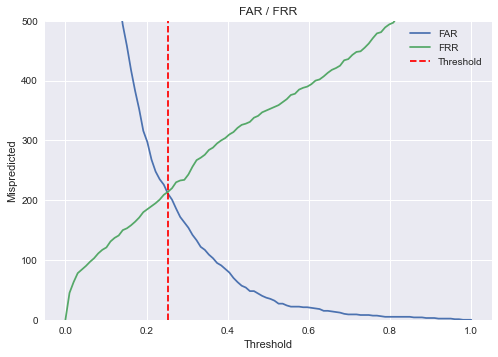

In [209]:
y_proba = rfc_ov.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 500)

In [210]:
for i in range(len(y_pred)):
    if y_proba[i,1]>=thresh:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [211]:
metricas_classificação(rfc_ov, y_pred, y_test)

Model: RandomForestClassifier(random_state=42)


Accuracy: 0.9998
Precision: 0.9221
Recall: 0.921
F1-Score: 0.9215
ROC AUC: 0.9605

Confusion Matrix
[[2096744     211]
 [    214    2496]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.92      0.92      0.92      2710

    accuracy                           1.00   2099665
   macro avg       0.96      0.96      0.96   2099665
weighted avg       1.00      1.00      1.00   2099665



#### Gradient Boosting

In [212]:
gbc_ov.fit(X_ovsamp, y_ovsamp)

GradientBoostingClassifier(random_state=42)

In [213]:
y_pred = gbc_ov.predict(X_test)

In [214]:
metricas_classificação(gbc_ov, y_pred, y_test)

Model: GradientBoostingClassifier(random_state=42)


Accuracy: 0.9997
Precision: 0.9313
Recall: 0.8601
F1-Score: 0.8943
ROC AUC: 0.93

Confusion Matrix
[[2096783     172]
 [    379    2331]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.93      0.86      0.89      2710

    accuracy                           1.00   2099665
   macro avg       0.97      0.93      0.95   2099665
weighted avg       1.00      1.00      1.00   2099665



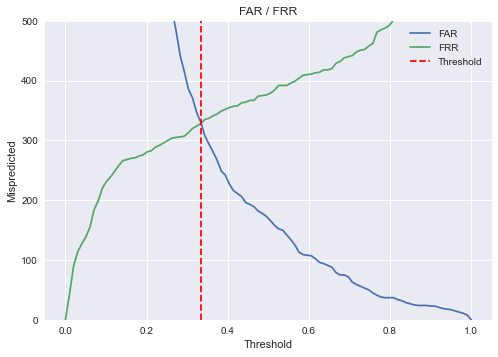

In [215]:
y_proba = gbc_ov.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 500)

In [216]:
for i in range(len(y_pred)):
    if y_proba[i,1]>=thresh:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [217]:
metricas_classificação(gbc_ov, y_pred, y_test)

Model: GradientBoostingClassifier(random_state=42)


Accuracy: 0.9997
Precision: 0.878
Recall: 0.879
F1-Score: 0.8785
ROC AUC: 0.9394

Confusion Matrix
[[2096624     331]
 [    328    2382]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.88      0.88      0.88      2710

    accuracy                           1.00   2099665
   macro avg       0.94      0.94      0.94   2099665
weighted avg       1.00      1.00      1.00   2099665



#### XGBoost

In [218]:
xgb_ov.fit(X_ovsamp, y_ovsamp)

[18:29:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)

In [219]:
y_pred = xgb_ov.predict(X_test)

In [220]:
metricas_classificação(xgb_ov, y_pred, y_test)

Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)


Accuracy: 0.9999
Precision: 0.9602
Recall: 0.9251
F1-Score: 0.9423
ROC AUC: 0.9625

Confusion Matrix
[[2096851     104]
 [    203    2507]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.96      0.93      0.94      2710

    accuracy                           1.00  

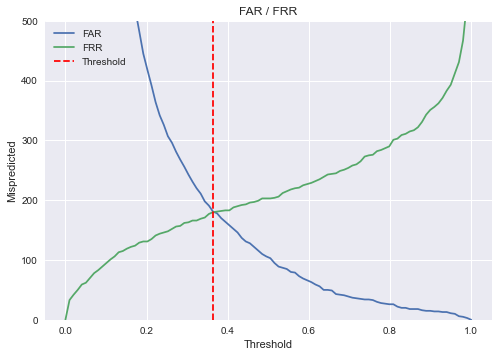

In [221]:
y_proba = xgb_ov.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 500)

In [222]:
for i in range(len(y_pred)):
    if y_proba[i,1]>=thresh:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [223]:
metricas_classificação(xgb_ov, y_pred, y_test)

Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)


Accuracy: 0.9998
Precision: 0.9332
Recall: 0.9336
F1-Score: 0.9334
ROC AUC: 0.9667

Confusion Matrix
[[2096774     181]
 [    180    2530]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.93      0.93      0.93      2710

    accuracy                           1.00  

#### Oversampling Results

In [224]:
oversampling_results=pd.DataFrame(list(zip(TN_list, FP_list, FN_list, TP_list, accuracy_list, precision_list, 
                                           recall_list, f1_list, roc_auc_list)),
                              columns=['TN', 'FP', 'FN', 'TP', 'Accuracy','Precision','Recall','F1 Score','ROC AUC'],
                              index=['Oversampling Logistic Regression',
                                     'Oversampling KNN',
                                     'Oversampling Decision Tree',
                                     'Oversampling Random Forest',
                                     'Oversampling+Threshold Random Forest',
                                     'Oversampling Gradient Boosting', 
                                     'Oversampling+Threshold Gradient Boosting', 
                                     'Oversampling XGBoost', 
                                     'Oversampling+Threshold XGBoost'])

É interessante notar que o oversampling foi a primeira estratégia capaz de obter dados classificados corretamente como fraude pelo modelo KNN. Para os modelos Decision Tree, Random Forest e Gradient Boosting a reamostragem por oversampling foi capaz de aumentar o Recall para o maior resultado até o momento.

In [225]:
oversampling_results

,TN,FP,FN,TP,Accuracy,Precision,Recall,F1 Score,ROC AUC
Oversampling Logistic Regression,2096955,0,2710,0,0.99870,0.00000,0.00000,0.00000,0.50000
Oversampling KNN,2089694,7261,2699,11,0.99530,0.00150,0.00410,0.00220,0.50030
Oversampling Decision Tree,2096687,268,293,2417,0.99970,0.90020,0.89190,0.89600,0.94590
Oversampling Random Forest,2096920,35,353,2357,0.99980,0.98540,0.86970,0.92400,0.93490
Oversampling+Threshold Random Forest,2096744,211,214,2496,0.99980,0.92210,0.92100,0.92150,0.96050
Oversampling Gradient Boosting,2096783,172,379,2331,0.99970,0.93130,0.86010,0.89430,0.93000
Oversampling+Threshold Gradient Boosting,2096624,331,328,2382,0.99970,0.87800,0.87900,0.87850,0.93940
Oversampling XGBoost,2096851,104,203,2507,0.99990,0.96020,0.92510,0.94230,0.96250
Oversampling+Threshold XGBoost,2096774,181,180,2530,0.99980,0.93320,0.93360,0.93340,0.96670


## SMOTE

Assim como o oversampling, SMOTE (Synthetic Minority Over-sampling Technique) é uma técnica de aumento dos dados de treino, mas, neste caso, ele cria novos dados artificais, não presentes originalmente no dataset de treino, tendo como significado.

Nela, uma elemento original da classe minotirária é aleatoriamente selecionado. A partir dele, um dos k vizinhos mais próximos da classe minoritária (onde k pode ser definido) é escolhido aleatoriamente. Com estes dois elementos originais, uma combinação linear dos mesmos resulta em um novo elemnto artificial. Isso é repetido até se atingir a proporção desejada. 

![SMOTE](https://www.researchgate.net/publication/332279195/figure/fig2/AS:745600182128640@1554776344042/The-basic-principle-of-the-synthetic-minority-oversample-technique-SMOTE-algorithm.png)
<center> Figura 4: SMOTE [5]

In [226]:
X_smote, y_smote = SMOTE(random_state=42, k_neighbors=5, sampling_strategy=.006).fit_resample(X_train, y_train)

In [227]:
print('Dos {} dados de treino com SMOTE, {} são fraudes e {} não são fraudes, uma proporção de {}'.format(
                                        len(y_smote), 
                                        y_smote[y_smote==1].count(), 
                                        y_smote[y_smote==0].count(),
                                        round(y_smote[y_smote==1].count()/y_smote[y_smote==0].count(), 4)))

Dos 4282996 dados de treino com undersampling, 25544 são fraudes e 4257452 não são fraudes, uma proporção de 0.006


In [228]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
TN_list = []
FP_list = []
FN_list = []
TP_list = []

In [229]:
lrc_smote = LogisticRegression(random_state=42)
knn_smote = KNeighborsClassifier()
dtc_smote = DecisionTreeClassifier(random_state=42)
rfc_smote = RandomForestClassifier(random_state=42)
gbc_smote = GradientBoostingClassifier(random_state=42)
xgb_smote = XGBClassifier(objective = 'binary:logistic', random_state=42)

#### Logistic Regression

In [230]:
lrc_smote.fit(X_smote, y_smote)

LogisticRegression(random_state=42)

In [231]:
y_pred = lrc_smote.predict(X_test)

In [232]:
metricas_classificação(lrc_smote, y_pred, y_test)

Model: LogisticRegression(random_state=42)


Accuracy: 0.9987
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC: 0.5

Confusion Matrix
[[2096955       0]
 [   2710       0]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.00      0.00      0.00      2710

    accuracy                           1.00   2099665
   macro avg       0.50      0.50      0.50   2099665
weighted avg       1.00      1.00      1.00   2099665



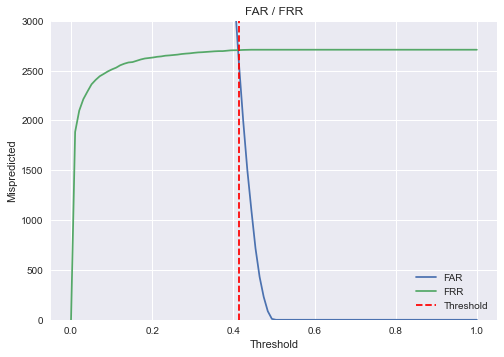

In [233]:
y_proba = lrc_smote.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 3000)

#### KNN

In [234]:
knn_smote.fit(X_smote, y_smote)

KNeighborsClassifier()

In [235]:
y_pred = knn_smote.predict(X_test)

In [236]:
metricas_classificação(knn_smote, y_pred, y_test)

Model: KNeighborsClassifier()


Accuracy: 0.9982
Precision: 0.002
Recall: 0.0007
F1-Score: 0.0011
ROC AUC: 0.5001

Confusion Matrix
[[2095932    1023]
 [   2708       2]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.00      0.00      0.00      2710

    accuracy                           1.00   2099665
   macro avg       0.50      0.50      0.50   2099665
weighted avg       1.00      1.00      1.00   2099665



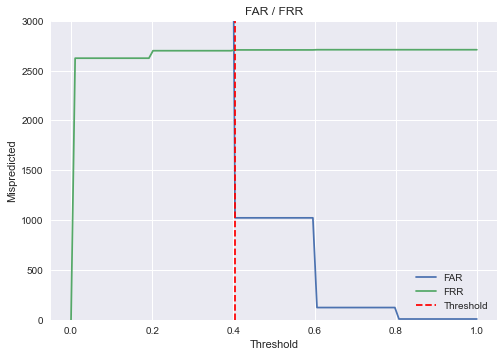

In [237]:
y_proba = knn_smote.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 3000)

#### Decision Tree

In [238]:
dtc_smote.fit(X_smote, y_smote)

DecisionTreeClassifier(random_state=42)

In [239]:
y_pred = dtc_smote.predict(X_test)

In [240]:
metricas_classificação(dtc_smote, y_pred, y_test)

Model: DecisionTreeClassifier(random_state=42)


Accuracy: 0.9997
Precision: 0.8792
Recall: 0.9
F1-Score: 0.8895
ROC AUC: 0.9499

Confusion Matrix
[[2096620     335]
 [    271    2439]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.88      0.90      0.89      2710

    accuracy                           1.00   2099665
   macro avg       0.94      0.95      0.94   2099665
weighted avg       1.00      1.00      1.00   2099665



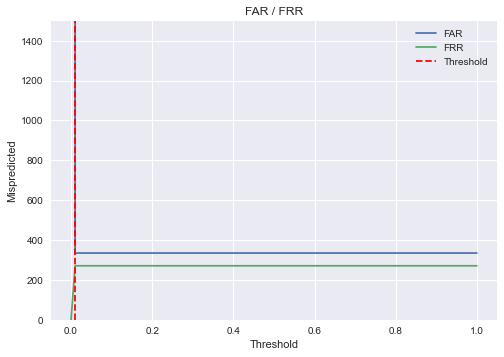

In [241]:
y_proba = dtc_smote.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 1500)

#### Random Forest

In [242]:
rfc_smote.fit(X_smote, y_smote)

RandomForestClassifier(random_state=42)

In [243]:
y_pred = rfc_smote.predict(X_test)

In [244]:
metricas_classificação(rfc_smote, y_pred, y_test)

Model: RandomForestClassifier(random_state=42)


Accuracy: 0.9998
Precision: 0.9824
Recall: 0.8668
F1-Score: 0.921
ROC AUC: 0.9334

Confusion Matrix
[[2096913      42]
 [    361    2349]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.98      0.87      0.92      2710

    accuracy                           1.00   2099665
   macro avg       0.99      0.93      0.96   2099665
weighted avg       1.00      1.00      1.00   2099665



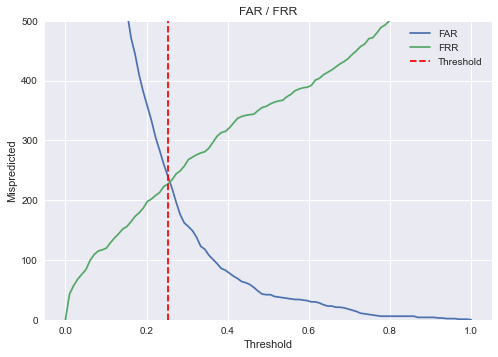

In [245]:
y_proba = rfc_smote.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 500)

In [246]:
for i in range(len(y_pred)):
    if y_proba[i,1]>=thresh:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [247]:
metricas_classificação(rfc_smote, y_pred, y_test)

Model: RandomForestClassifier(random_state=42)


Accuracy: 0.9998
Precision: 0.9119
Recall: 0.9162
F1-Score: 0.914
ROC AUC: 0.9581

Confusion Matrix
[[2096715     240]
 [    227    2483]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.91      0.92      0.91      2710

    accuracy                           1.00   2099665
   macro avg       0.96      0.96      0.96   2099665
weighted avg       1.00      1.00      1.00   2099665



#### Gradient Boosting

In [248]:
gbc_smote.fit(X_smote, y_smote)

GradientBoostingClassifier(random_state=42)

In [249]:
y_pred = gbc_smote.predict(X_test)

In [250]:
metricas_classificação(gbc_smote, y_pred, y_test)

Model: GradientBoostingClassifier(random_state=42)


Accuracy: 0.9997
Precision: 0.9188
Recall: 0.8347
F1-Score: 0.8747
ROC AUC: 0.9173

Confusion Matrix
[[2096755     200]
 [    448    2262]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.92      0.83      0.87      2710

    accuracy                           1.00   2099665
   macro avg       0.96      0.92      0.94   2099665
weighted avg       1.00      1.00      1.00   2099665



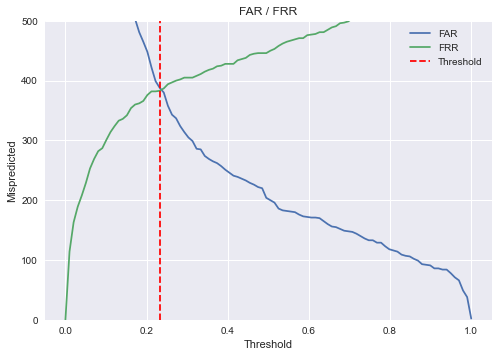

In [251]:
y_proba = gbc_smote.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 500)

In [252]:
for i in range(len(y_pred)):
    if y_proba[i,1]>=thresh:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [253]:
metricas_classificação(gbc_smote, y_pred, y_test)

Model: GradientBoostingClassifier(random_state=42)


Accuracy: 0.9996
Precision: 0.8571
Recall: 0.8587
F1-Score: 0.8579
ROC AUC: 0.9292

Confusion Matrix
[[2096567     388]
 [    383    2327]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.86      0.86      0.86      2710

    accuracy                           1.00   2099665
   macro avg       0.93      0.93      0.93   2099665
weighted avg       1.00      1.00      1.00   2099665



#### XGBoost

In [254]:
xgb_smote.fit(X_smote, y_smote)

[19:55:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)

In [255]:
y_pred = xgb_smote.predict(X_test)

In [256]:
metricas_classificação(xgb_smote, y_pred, y_test)

Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)


Accuracy: 0.9999
Precision: 0.9827
Recall: 0.9037
F1-Score: 0.9416
ROC AUC: 0.9518

Confusion Matrix
[[2096912      43]
 [    261    2449]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.98      0.90      0.94      2710

    accuracy                           1.00  

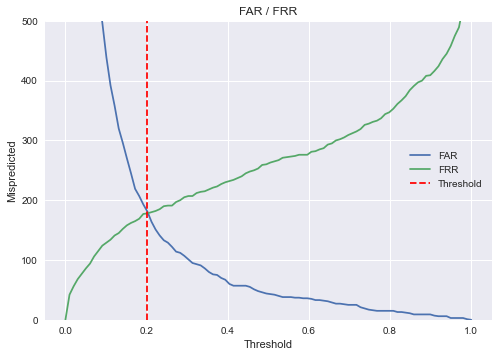

In [257]:
y_proba = xgb_smote.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 500)

In [258]:
for i in range(len(y_pred)):
    if y_proba[i,1]>=thresh:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [259]:
metricas_classificação(xgb_smote, y_pred, y_test)

Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)


Accuracy: 0.9998
Precision: 0.9333
Recall: 0.9343
F1-Score: 0.9338
ROC AUC: 0.9671

Confusion Matrix
[[2096774     181]
 [    178    2532]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.93      0.93      0.93      2710

    accuracy                           1.00  

#### SMOTE Results

In [260]:
smote_results=pd.DataFrame(list(zip(TN_list, FP_list, FN_list, TP_list, accuracy_list, precision_list, 
                                    recall_list, f1_list, roc_auc_list)),
                              columns=['TN', 'FP', 'FN', 'TP', 'Accuracy','Precision','Recall','F1 Score','ROC AUC'],
                              index=['SMOTE Logistic Regression',
                                     'SMOTE KNN',
                                     'SMOTE Decision Tree',
                                     'SMOTE Random Forest',
                                     'SMOTE+Threshold Random Forest',
                                     'SMOTE Gradient Boosting', 
                                     'SMOTE+Threshold Gradient Boosting', 
                                     'SMOTE XGBoost', 
                                     'SMOTE+Threshold XGBoost'])

O rebalanceamento com SMOTE foi capaz de aumentar a performance de todos os modelos em relação ao Baseline definido, no entanto, não superando as performances obtidas pelo Oversampling ou Undersampling.

In [261]:
smote_results

,TN,FP,FN,TP,Accuracy,Precision,Recall,F1 Score,ROC AUC
SMOTE Logistic Regression,2096955,0,2710,0,0.99870,0.00000,0.00000,0.00000,0.50000
SMOTE KNN,2095932,1023,2708,2,0.99820,0.00200,0.00070,0.00110,0.50010
SMOTE Decision Tree,2096620,335,271,2439,0.99970,0.87920,0.90000,0.88950,0.94990
SMOTE Random Forest,2096913,42,361,2349,0.99980,0.98240,0.86680,0.92100,0.93340
SMOTE+Threshold Random Forest,2096715,240,227,2483,0.99980,0.91190,0.91620,0.91400,0.95810
SMOTE Gradient Boosting,2096755,200,448,2262,0.99970,0.91880,0.83470,0.87470,0.91730
SMOTE+Threshold Gradient Boosting,2096567,388,383,2327,0.99960,0.85710,0.85870,0.85790,0.92920
SMOTE XGBoost,2096912,43,261,2449,0.99990,0.98270,0.90370,0.94160,0.95180
SMOTE+Threshold XGBoost,2096774,181,178,2532,0.99980,0.93330,0.93430,0.93380,0.96710


## ADASYN

O ADASYN (Adaptive Synthetic) tem uma pequena diferença em relação ao SMOTE, em que após a combinação linear é adicionato um fator aleatório, de modo que o elemento sintético não seja uma combinação linear perfeita, tendo uma semelhança maior com a realidade. Além disso, o ADASYN gera novas amostras principalmente próximas às zonas em que os dados originais são de mais díficil classificação, isto é, onde existe maior sobreposição de fraudes e não fraudes.

In [262]:
X_adasyn, y_adasyn = ADASYN(random_state=42, n_neighbors=5, sampling_strategy=.006).fit_resample(X_train, y_train)

In [263]:
print('Dos {} dados de treino com ADASYN, {} são fraudes e {} não são fraudes, uma proporção de {}'.format(
                                        len(y_adasyn), 
                                        y_adasyn[y_adasyn==1].count(), 
                                        y_adasyn[y_adasyn==0].count(),
                                        round(y_adasyn[y_adasyn==1].count()/y_adasyn[y_adasyn==0].count(), 4)))

Dos 4284907 dados de treino com undersampling, 27455 são fraudes e 4257452 não são fraudes, uma proporção de 0.0064


In [264]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
TN_list = []
FP_list = []
FN_list = []
TP_list = []

In [265]:
lrc_adasyn = LogisticRegression(random_state=42)
knn_adasyn = KNeighborsClassifier()
dtc_adasyn = DecisionTreeClassifier(random_state=42)
rfc_adasyn = RandomForestClassifier(random_state=42)
gbc_adasyn = GradientBoostingClassifier(random_state=42)
xgb_adasyn = XGBClassifier(objective = 'binary:logistic', random_state=42)

#### Logistic Regression

In [266]:
lrc_adasyn.fit(X_adasyn, y_adasyn)

LogisticRegression(random_state=42)

In [267]:
y_pred = lrc_adasyn.predict(X_test)

In [268]:
metricas_classificação(lrc_adasyn, y_pred, y_test)

Model: LogisticRegression(random_state=42)


Accuracy: 0.9987
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC: 0.5

Confusion Matrix
[[2096955       0]
 [   2710       0]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.00      0.00      0.00      2710

    accuracy                           1.00   2099665
   macro avg       0.50      0.50      0.50   2099665
weighted avg       1.00      1.00      1.00   2099665



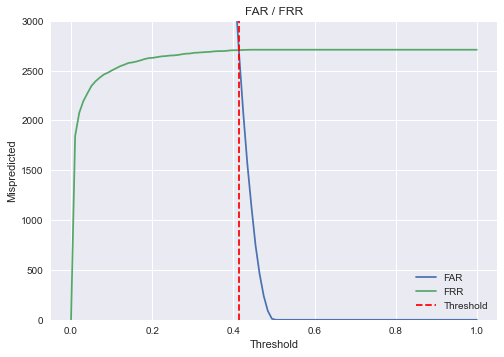

In [269]:
y_proba = lrc_adasyn.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 3000)

#### KNN

In [270]:
knn_adasyn.fit(X_adasyn, y_adasyn)

KNeighborsClassifier()

In [271]:
y_pred = knn_adasyn.predict(X_test)

In [272]:
metricas_classificação(knn_adasyn, y_pred, y_test)

Model: KNeighborsClassifier()


Accuracy: 0.9982
Precision: 0.0018
Recall: 0.0007
F1-Score: 0.001
ROC AUC: 0.5001

Confusion Matrix
[[2095851    1104]
 [   2708       2]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.00      0.00      0.00      2710

    accuracy                           1.00   2099665
   macro avg       0.50      0.50      0.50   2099665
weighted avg       1.00      1.00      1.00   2099665



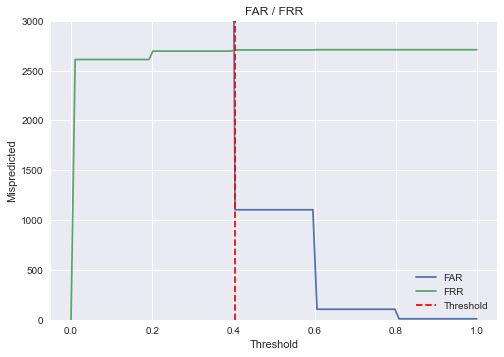

In [273]:
y_proba = knn_adasyn.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 3000)

#### Decision Tree

In [274]:
dtc_adasyn.fit(X_adasyn, y_adasyn)

DecisionTreeClassifier(random_state=42)

In [275]:
y_pred = dtc_adasyn.predict(X_test)

In [276]:
metricas_classificação(dtc_adasyn, y_pred, y_test)

Model: DecisionTreeClassifier(random_state=42)


Accuracy: 0.9997
Precision: 0.8801
Recall: 0.9048
F1-Score: 0.8923
ROC AUC: 0.9523

Confusion Matrix
[[2096621     334]
 [    258    2452]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.88      0.90      0.89      2710

    accuracy                           1.00   2099665
   macro avg       0.94      0.95      0.95   2099665
weighted avg       1.00      1.00      1.00   2099665



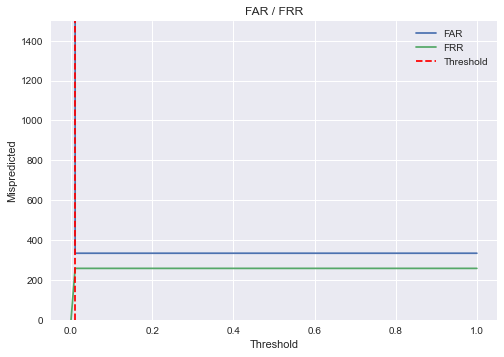

In [277]:
y_proba = dtc_adasyn.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 1500)

#### Random Forest

In [278]:
rfc_adasyn.fit(X_adasyn, y_adasyn)

RandomForestClassifier(random_state=42)

In [279]:
y_pred = rfc_adasyn.predict(X_test)

In [280]:
metricas_classificação(rfc_adasyn, y_pred, y_test)

Model: RandomForestClassifier(random_state=42)


Accuracy: 0.9998
Precision: 0.9816
Recall: 0.8661
F1-Score: 0.9202
ROC AUC: 0.933

Confusion Matrix
[[2096911      44]
 [    363    2347]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.98      0.87      0.92      2710

    accuracy                           1.00   2099665
   macro avg       0.99      0.93      0.96   2099665
weighted avg       1.00      1.00      1.00   2099665



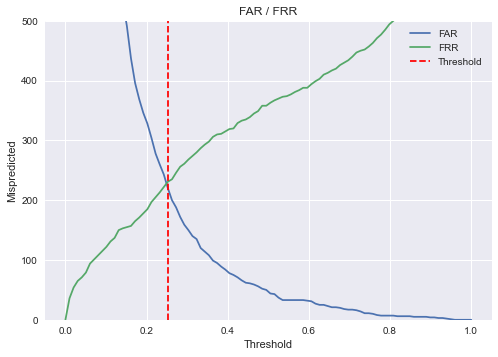

In [281]:
y_proba = rfc_adasyn.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 500)

In [282]:
for i in range(len(y_pred)):
    if y_proba[i,1]>=thresh:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [283]:
metricas_classificação(rfc_adasyn, y_pred, y_test)

Model: RandomForestClassifier(random_state=42)


Accuracy: 0.9998
Precision: 0.9185
Recall: 0.9148
F1-Score: 0.9166
ROC AUC: 0.9573

Confusion Matrix
[[2096735     220]
 [    231    2479]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.92      0.91      0.92      2710

    accuracy                           1.00   2099665
   macro avg       0.96      0.96      0.96   2099665
weighted avg       1.00      1.00      1.00   2099665



#### Gradient Boosting

In [284]:
gbc_adasyn.fit(X_adasyn, y_adasyn)

GradientBoostingClassifier(random_state=42)

In [285]:
y_pred = gbc_adasyn.predict(X_test)

In [286]:
metricas_classificação(gbc_adasyn, y_pred, y_test)

Model: GradientBoostingClassifier(random_state=42)


Accuracy: 0.9997
Precision: 0.9225
Recall: 0.8299
F1-Score: 0.8737
ROC AUC: 0.9149

Confusion Matrix
[[2096766     189]
 [    461    2249]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.92      0.83      0.87      2710

    accuracy                           1.00   2099665
   macro avg       0.96      0.91      0.94   2099665
weighted avg       1.00      1.00      1.00   2099665



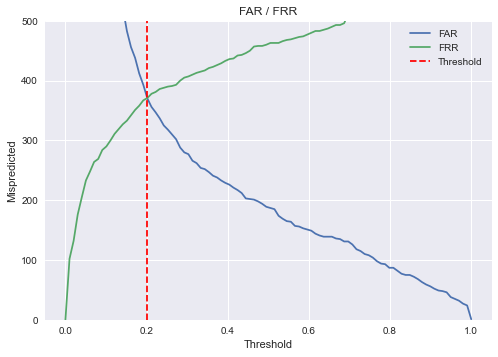

In [287]:
y_proba = gbc_adasyn.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 500)

In [288]:
for i in range(len(y_pred)):
    if y_proba[i,1]>=thresh:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [289]:
metricas_classificação(gbc_adasyn, y_pred, y_test)

Model: GradientBoostingClassifier(random_state=42)


Accuracy: 0.9996
Precision: 0.8634
Recall: 0.8631
F1-Score: 0.8633
ROC AUC: 0.9315

Confusion Matrix
[[2096585     370]
 [    371    2339]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.86      0.86      0.86      2710

    accuracy                           1.00   2099665
   macro avg       0.93      0.93      0.93   2099665
weighted avg       1.00      1.00      1.00   2099665



#### XGBoost

In [290]:
xgb_adasyn.fit(X_adasyn, y_adasyn)

[21:16:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)

In [291]:
y_pred = xgb_adasyn.predict(X_test)

In [292]:
metricas_classificação(xgb_adasyn, y_pred, y_test)

Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)


Accuracy: 0.9999
Precision: 0.9819
Recall: 0.9033
F1-Score: 0.941
ROC AUC: 0.9516

Confusion Matrix
[[2096910      45]
 [    262    2448]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.98      0.90      0.94      2710

    accuracy                           1.00   

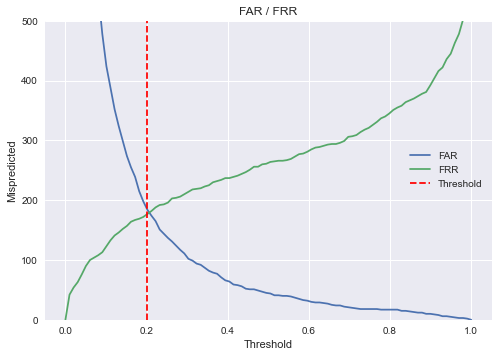

In [293]:
y_proba = xgb_adasyn.predict_proba(X_test)
thresh = calculate_far_frr (y_proba , y_test, n_points =100, normalize =False, threshold =None, ylimit = 500)

In [294]:
for i in range(len(y_pred)):
    if y_proba[i,1]>=thresh:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [295]:
metricas_classificação(xgb_adasyn, y_pred, y_test)

Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)


Accuracy: 0.9998
Precision: 0.9323
Recall: 0.9347
F1-Score: 0.9335
ROC AUC: 0.9673

Confusion Matrix
[[2096771     184]
 [    177    2533]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.93      0.93      0.93      2710

    accuracy                           1.00  

#### ADASYN Results

In [296]:
adasyn_results=pd.DataFrame(list(zip(TN_list, FP_list, FN_list, TP_list, accuracy_list, precision_list, 
                                     recall_list, f1_list, roc_auc_list)),
                              columns=['TN', 'FP', 'FN', 'TP', 'Accuracy','Precision','Recall','F1 Score','ROC AUC'],
                              index=['ADASYN Logistic Regression',
                                     'ADASYN KNN',
                                     'ADASYN Decision Tree',
                                     'ADASYN Random Forest',
                                     'ADASYN+Threshold Random Forest',
                                     'ADASYN Gradient Boosting', 
                                     'ADASYN+Threshold Gradient Boosting', 
                                     'ADASYN XGBoost', 
                                     'ADASYN+Threshold XGBoost'])

Novamente, o rebalanceamento do dado de treino com ADASYN se mostrou eficiente para a maioria dos modelos, tendo no entanto uma piora em relação ao baseline para o XGBoost (mas ainda obtendo a melhor performance dentre os modelos abaixos).

In [297]:
adasyn_results

,TN,FP,FN,TP,Accuracy,Precision,Recall,F1 Score,ROC AUC
ADASYN Logistic Regression,2096955,0,2710,0,0.99870,0.00000,0.00000,0.00000,0.50000
ADASYN KNN,2095851,1104,2708,2,0.99820,0.00180,0.00070,0.00100,0.50010
ADASYN Decision Tree,2096621,334,258,2452,0.99970,0.88010,0.90480,0.89230,0.95230
ADASYN Random Forest,2096911,44,363,2347,0.99980,0.98160,0.86610,0.92020,0.93300
ADASYN+Threshold Random Forest,2096735,220,231,2479,0.99980,0.91850,0.91480,0.91660,0.95730
ADASYN Gradient Boosting,2096766,189,461,2249,0.99970,0.92250,0.82990,0.87370,0.91490
ADASYN+Threshold Gradient Boosting,2096585,370,371,2339,0.99960,0.86340,0.86310,0.86330,0.93150
ADASYN XGBoost,2096910,45,262,2448,0.99990,0.98190,0.90330,0.94100,0.95160
ADASYN+Threshold XGBoost,2096771,184,177,2533,0.99980,0.93230,0.93470,0.93350,0.96730


## 8. Análise dos Resultados <a name="resultados"></a>

Por fim, iremos avaliar os modelos em conjunto, comparando-os mais facilmente, agrupando o modelo e ordenando por Recall obtido.

In [298]:
concatenate = [baseline_results, th_results, cw_results, undersampling_results, oversampling_results, 
               smote_results, adasyn_results]

result = pd.concat(concatenate)

In [299]:
result=result.reset_index()
result['Condition']=result['index'].apply(lambda x: x.split(" ", 1)[0])
result['Model']=result['index'].apply(lambda x: x.split(" ", 1)[1])

In [300]:
result=result[['index','Model','Condition','TN', 'FP', 'FN', 'TP', 'Accuracy', 'Precision', 'Recall', 
               'F1 Score', 'ROC AUC']]
result.set_index('index',inplace=True)

In [301]:
result.sort_values(['Model','Recall'], ascending=False)[['TN', 'FP', 'FN', 'TP', 'Accuracy', 'Precision', 'Recall', 
                                                 'F1 Score', 'ROC AUC']]

,TN,FP,FN,TP,Accuracy,Precision,Recall,F1 Score,ROC AUC
index,,,,,,,,,
Undersampling+Threshold XGBoost,2096778,177,173,2537,0.99980,0.93480,0.93620,0.93550,0.96800
Threshold XGBoost,2096780,175,175,2535,0.99980,0.93540,0.93540,0.93540,0.96770
ClassWeight+Threshold XGBoost,2096780,175,175,2535,0.99980,0.93540,0.93540,0.93540,0.96770
Undersampling XGBoost,2096781,174,175,2535,0.99980,0.93580,0.93540,0.93560,0.96770
ADASYN+Threshold XGBoost,2096771,184,177,2533,0.99980,0.93230,0.93470,0.93350,0.96730
SMOTE+Threshold XGBoost,2096774,181,178,2532,0.99980,0.93330,0.93430,0.93380,0.96710
Oversampling+Threshold XGBoost,2096774,181,180,2530,0.99980,0.93320,0.93360,0.93340,0.96670
Oversampling XGBoost,2096851,104,203,2507,0.99990,0.96020,0.92510,0.94230,0.96250
SMOTE XGBoost,2096912,43,261,2449,0.99990,0.98270,0.90370,0.94160,0.95180


Podemos realizar o filtro e a comparação que desejarmos, no entanto, para tornar mais visual, iremos plotar as métricas em um Heatmap, de forma a destacar os extremos.

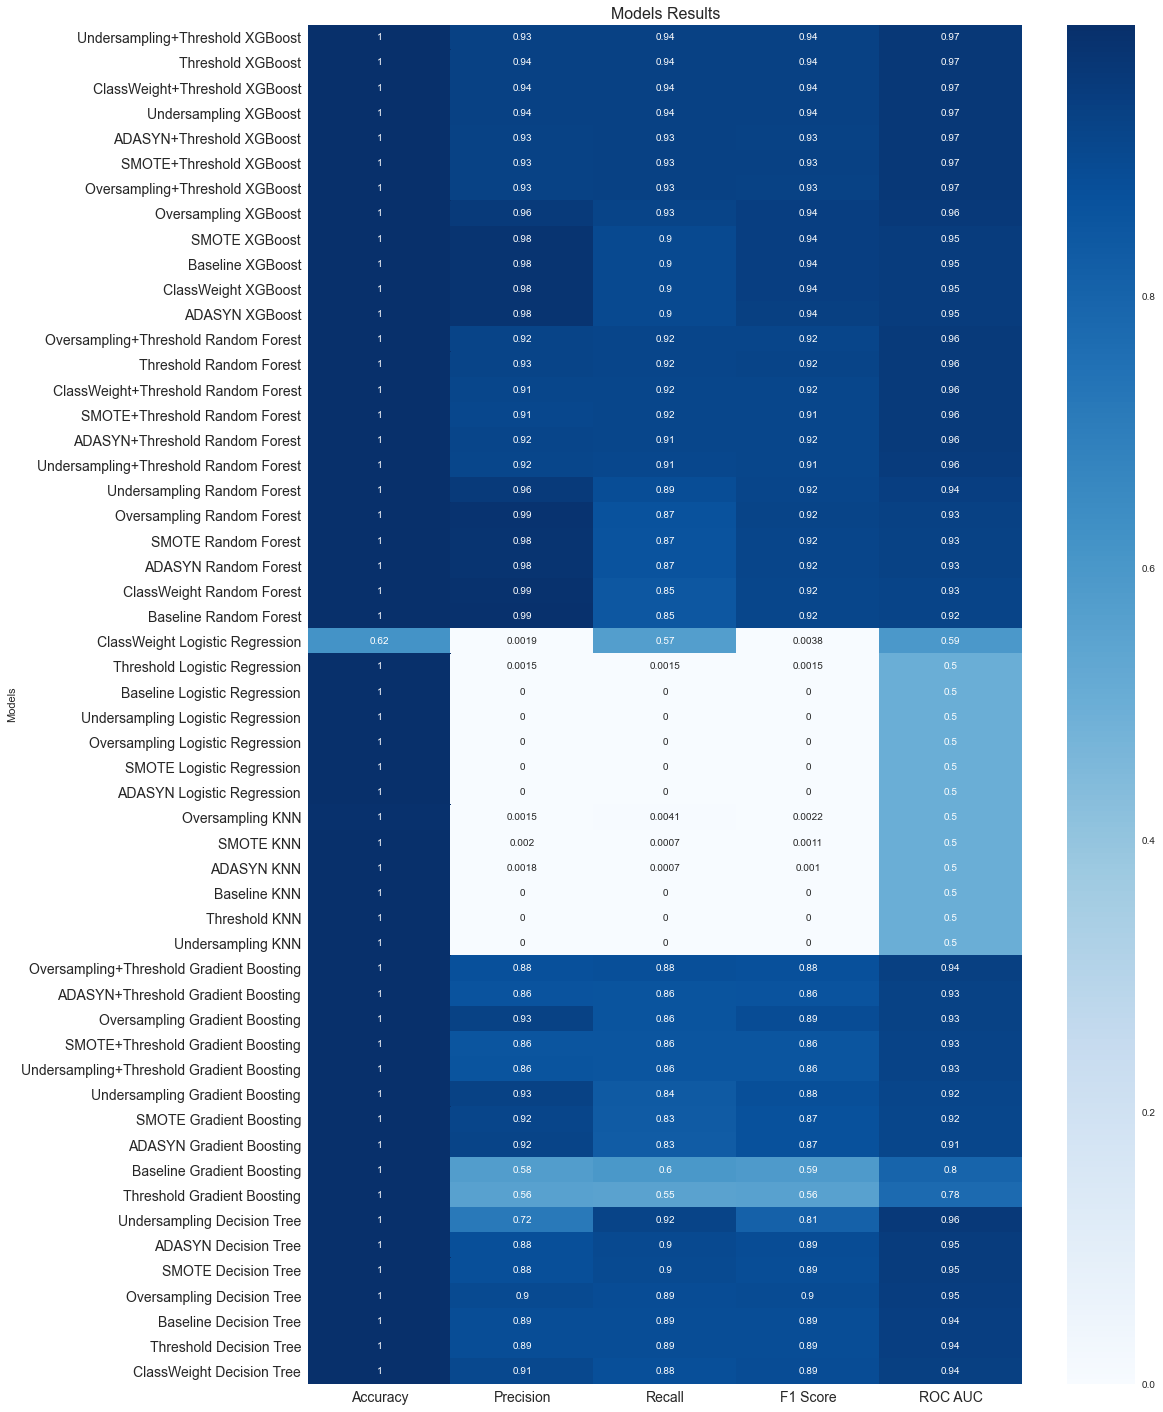

In [302]:
plt.figure(figsize=(16,25))
sns.heatmap(result.sort_values(['Model','Recall'],ascending=False)[['Accuracy', 'Precision', 'Recall', 
                                                 'F1 Score', 'ROC AUC']],
            annot=True,cmap = "Blues")
plt.xticks(size = 14)
plt.yticks(size = 14, rotation = 0)
plt.ylabel("Models")
plt.title("Models Results", size = 16)
plt.show()

Com Heatmap podemos facilmente visualizar que a acurácia de todos os modelos é praticamente 1, exceto do ClassWeight Logistic Regression, que apesar de ser o que conseguiu identificar a maior quantidade de fraudes dentre as Logistic Regression, isso foi obtido com a perda de mais de 800.000 falsos positivos. 

O modelo KNN não se mostrou aplicável, tendo sempre métricas próximas de 0 e um AUC que nunca superou 0.5.

Para o Gradient Boosting, os modelos sem nenhum balanceamento não tiveram uma performance interessante, com AUC igual ou menor a 0.8.  

Para o Decision Tree, é interessante notar que o modelo que obteve o maior recall e AUC foi obtido em troca de uma perda grande na precisão, grando quase 1000 falsos positivos. 

Para uma análise mais a fundo, removeremos as métricas abaixo de 0.82, obtendo uma escala de cor mais detalhada. Removeremos também a acurácia, uma vez que ela é 1 para todos os modelos em questão.

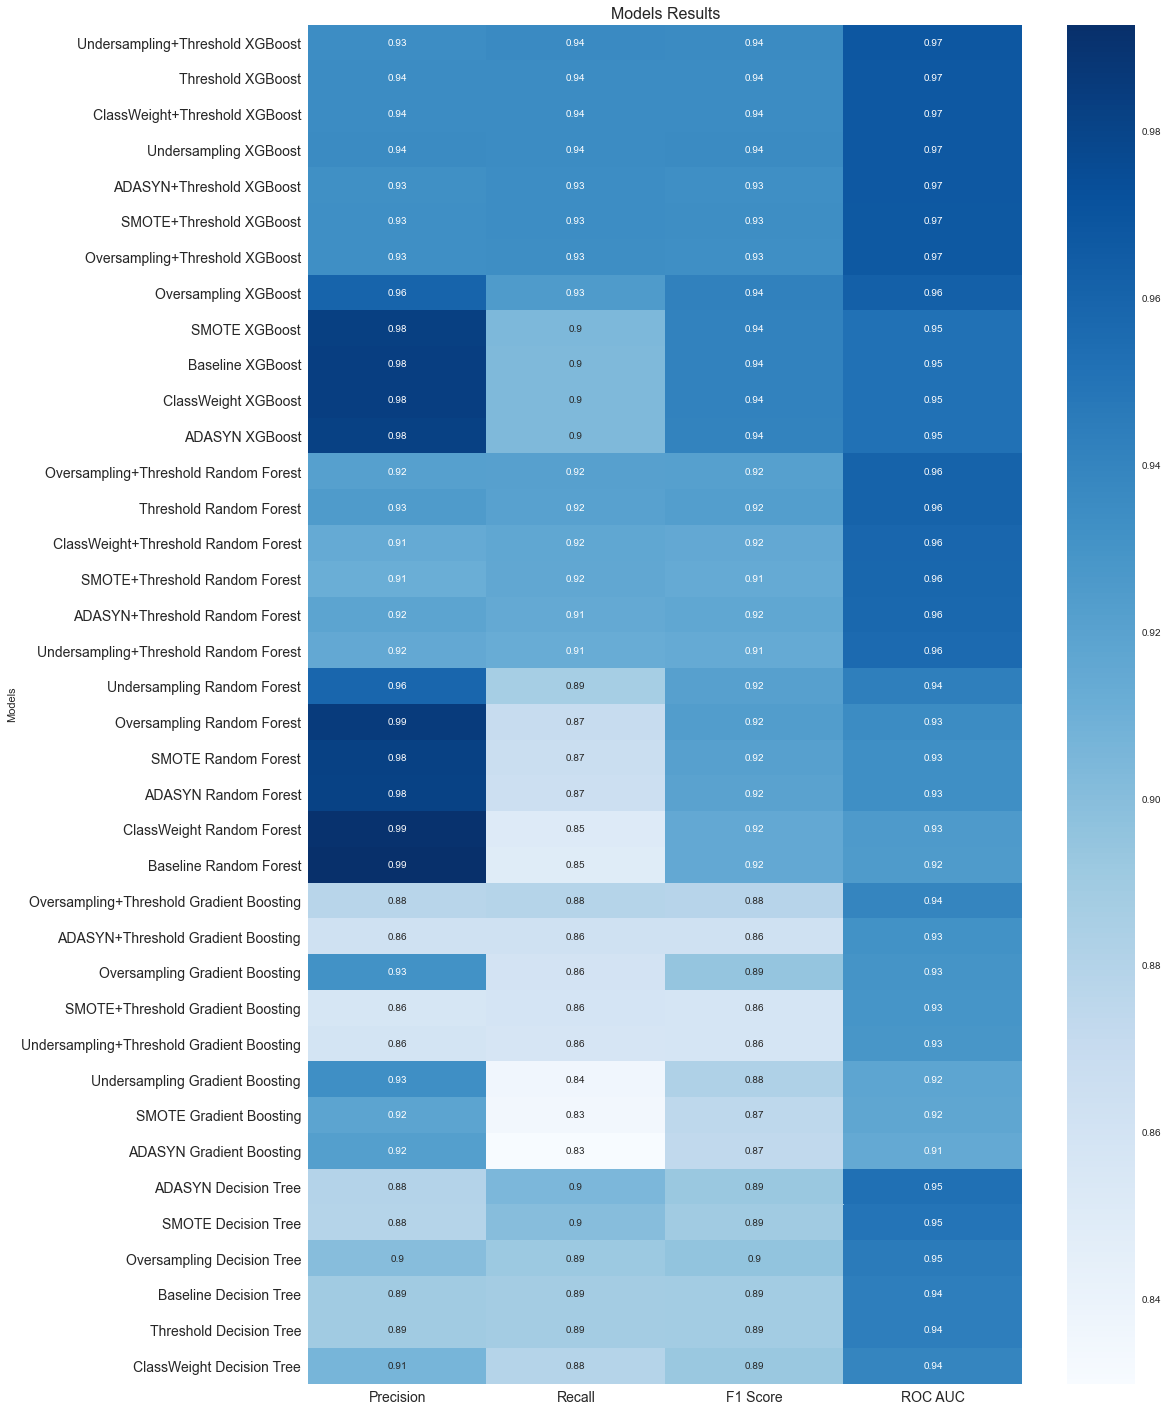

In [305]:
plt.figure(figsize=(16,25))
sns.heatmap(result[(result['Model']!='KNN')&(result['Model']!='Logistic Regression')].drop(
    labels=['Baseline Gradient Boosting', 'Threshold Gradient Boosting', 'Undersampling Decision Tree']).sort_values(
    ['Model','Recall'],ascending=False)[['Precision', 'Recall', 'F1 Score', 'ROC AUC']],
            annot=True,cmap = "Blues")
plt.xticks(size = 14)
plt.yticks(size = 14, rotation = 0)
plt.ylabel("Models")
plt.title("Models Results", size = 16)
plt.show()

O modelo Decision Tree foi capaz de obter um bom AUC, no entanto, com um recall  máximo de 0.9.

O modelo Gradient Boosting, como vimos anteriormente, teve uma performance baixa sem nenhuma mudança para lidar com o desbalanceamento. É possível perceber uma melhora no seu desempenho utilizando rebalanceamento, em especial utilizando o Oversampling, tendo o maior equilibrio através de Oversampling mundando o ponto de Threshold.

O Random Forest foi capaz de obter uma excelente precisão no geral dos modelos, sendo aquele que minimizou o número de falsos positivos sem resultar numa enorme perda de fraudes. Ele obteve bons resultados de AUC, F1 Score, Recall e Precisão após rebalanceamento e mudança de Threshold. 

Por fim, o modelo que perfomou melhor foi o XGBoost. Ele se mostrou capaz de se adequar à necessidade de negócios, minimizando os falsos positivos, minimizando a quantidade de fraudes, assim como obtendo os maiores F1 Score e AUC.

É possível plotar uma visualização semelhante para os falsos positivos e negativos. 

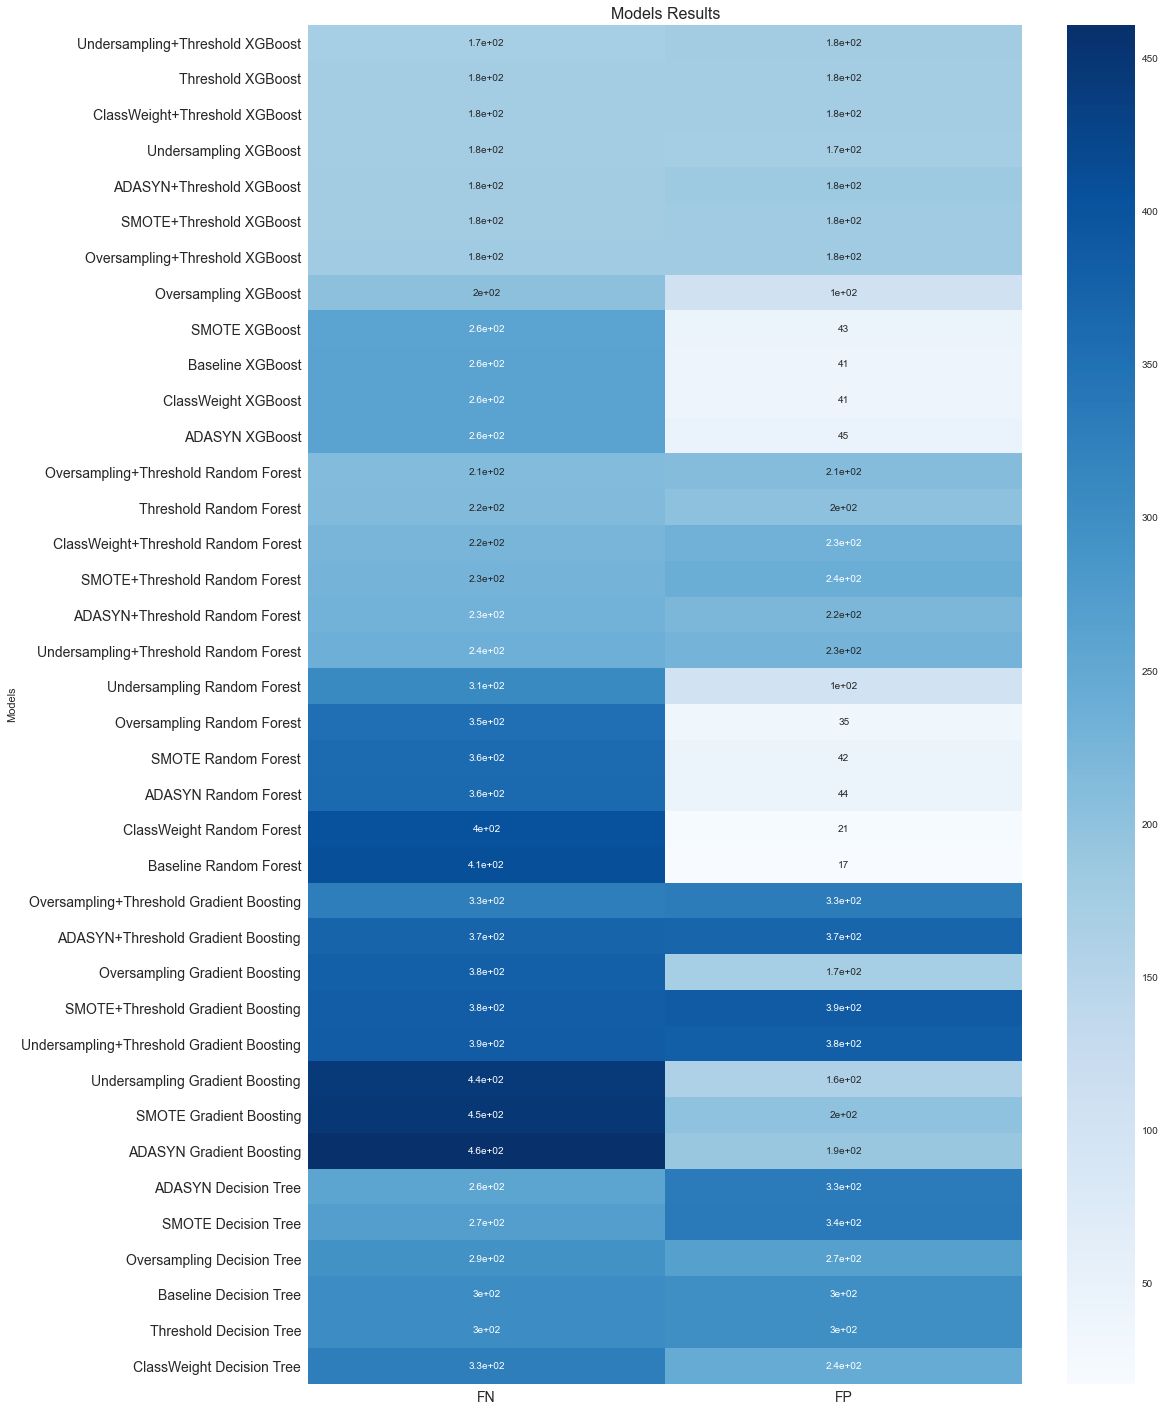

In [309]:
plt.figure(figsize=(16,25))
sns.heatmap(result[(result['Model']!='KNN')&(result['Model']!='Logistic Regression')].drop(
    labels=['Baseline Gradient Boosting', 'Threshold Gradient Boosting', 'Undersampling Decision Tree']).sort_values(
    ['Model','Recall'], ascending=False)[['FN', 'FP']], annot=True,cmap = "Blues")
plt.xticks(size = 14)
plt.yticks(size = 14, rotation = 0)
plt.ylabel("Models")
plt.title("Models Results", size = 16)
plt.show()

Como anteriormente definimos que o modelo tinha como objetivo maximizar a quantidade de fraudes identificadas ao mesmo tempo que minimizando os falsos negativos, estamos buscando uma posição de equilíbrio entre os falsos positivos e falsos negativos.

Assim, o melhor resultado foi obtido pelo modelo XGBoost com Undersampling, em que apenas um total de 349 transações foram incorretamente classificadas, dos quais 175 fraudes não foram detectadas, com uma troca de 174 transações normais que foram bloqueadas. Esse resultado permite  O threshold poderia ser aplicado para ajustes finos conforme necessário.

## 9. Conclusão <a name="conclusao"></a>

A solução ideal é aquela que melhor atende a instituição, sendo fundamental um entendimento com o time de negócios de qual o objetivo, podendo modelar a fim de se maximar ou balancear a performance de acordo com a necessidade, podendo ser a com o maior AUC, a com o maior número de detecção de fraudes ou mesmo com menor número de falsos positivos.

O projeto não necessitou uma limpeza dos dados, mas um pré processamento e Feature Engineering se mostraram eficientes para uma boa modelagem. 

Diferentes abordagens para se trabalhar com dados desbalanceados foram exploradas, assim como diferentes modelos. Um próximo passo possível seria realizar um tuning dos hiperparâmetros. Além disso, outras variáveis que não estavam presentes no dataset poderiam ser interessantes, caso estivessem disponíveis, como a renda do responsável pela conta, ou principalmente dados históricos para além de um mês. Como a simulação representava apenas 30 dias de transações, não existe um histórico extenso de transações usualmente realizadas pelo usuário, fator que poderia impulsionar a performance dos modelos.

## 10. Referências <a name="references"></a>

- [1] Fraudes em 2021: https://einvestidor.estadao.com.br/ultimas/2021-recorde-ano-mais-tentativas-fraudes
- [2] FAR x FRR: https://www.recogtech.com/en/knowledge-base/security-level-versus-user-convenience
- [3] Undersampling: https://i1.wp.com/dataaspirant.com/wp-content/uploads/2020/08/17-undersampling.png
- [4] Oversampling: https://i0.wp.com/dataaspirant.com/wp-content/uploads/2020/08/10-oversampling.png
- [5] SMOTE: https://www.researchgate.net/figure/The-basic-principle-of-the-synthetic-minority-oversample-technique-SMOTE-algorithm_fig2_332279195